In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create dataframe from dataset
data=pd.read_csv(r"C:\Users\Asus\Documents\dataset\Crop_production.csv")
data

Unnamed: 0      State_Name Crop_Type       Crop    N   P   K    pH  \
0               0  andhra pradesh    kharif     cotton  120  40  20  5.46   
1               1  andhra pradesh    kharif  horsegram   20  60  20  6.18   
2               2  andhra pradesh    kharif      jowar   80  40  40  5.42   
3               3  andhra pradesh    kharif      maize   80  40  20  5.62   
4               4  andhra pradesh    kharif      moong   20  40  20  5.68   
...           ...             ...       ...        ...  ...  ..  ..   ...   
99844       99844     west bengal      rabi      wheat   60  30  30  6.70   
99845       99845     west bengal    summer      maize   80  40  20  5.68   
99846       99846     west bengal    summer       rice   80  40  40  5.64   
99847       99847     west bengal      rabi       rice   80  40  40  5.42   
99848       99848     west bengal      rabi    sesamum   30  15  30  6.54   

       rainfall  temperature  Area_in_hectares  Production_in_tons  \
0        654.34    29.266667            7300.0              9400.0   
1        654.34    29.266667            3300.0              1000.0   
2        654.34    29.266667           10100.0             10200.0   
3        654.34    29.266667            2800.0              4900.0   
4        654.34    29.266667            1300.0               500.0   
...         ...          ...               ...                 ...   
99844    152.54    22.280000            2013.0              5152.0   
99845    182.50    29.200000             258.0               391.0   
99846    182.50    29.200000             105.0               281.0   
99847    152.54    22.280000          152676.0            261435.0   
99848    152.54    22.280000             244.0                95.0   

       Yield_ton_per_hec  
0               1.287671  
1               0.303030  
2               1.009901  
3               1.750000  
4               0.384615  
...                  ...  
99844           2.559364  
99845           1.515504  
99846           2.676190  
99847           1.712352  
99848           0.389344  

[99849 rows x 13 columns]

In [3]:
data.shape

(99849, 13)

# Dropping Variables

In [4]:
#remove 'unnamed' column because this is not really useful for our model, and if we don't remove it our model consider it as real value
#and make wrong predictions.
data=data.drop('Unnamed: 0',axis=1)

In [5]:
#check initial 5 records
data.head()

State_Name Crop_Type       Crop    N   P   K    pH  rainfall  \
0  andhra pradesh    kharif     cotton  120  40  20  5.46    654.34   
1  andhra pradesh    kharif  horsegram   20  60  20  6.18    654.34   
2  andhra pradesh    kharif      jowar   80  40  40  5.42    654.34   
3  andhra pradesh    kharif      maize   80  40  20  5.62    654.34   
4  andhra pradesh    kharif      moong   20  40  20  5.68    654.34   

   temperature  Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
0    29.266667            7300.0              9400.0           1.287671  
1    29.266667            3300.0              1000.0           0.303030  
2    29.266667           10100.0             10200.0           1.009901  
3    29.266667            2800.0              4900.0           1.750000  
4    29.266667            1300.0               500.0           0.384615

In [6]:
#check last 5 records
data.tail()

State_Name Crop_Type     Crop   N   P   K    pH  rainfall  \
99844  west bengal      rabi    wheat  60  30  30  6.70    152.54   
99845  west bengal    summer    maize  80  40  20  5.68    182.50   
99846  west bengal    summer     rice  80  40  40  5.64    182.50   
99847  west bengal      rabi     rice  80  40  40  5.42    152.54   
99848  west bengal      rabi  sesamum  30  15  30  6.54    152.54   

       temperature  Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
99844        22.28            2013.0              5152.0           2.559364  
99845        29.20             258.0               391.0           1.515504  
99846        29.20             105.0               281.0           2.676190  
99847        22.28          152676.0            261435.0           1.712352  
99848        22.28             244.0                95.0           0.389344

In [7]:
data.dtypes

State_Name             object
Crop_Type              object
Crop                   object
N                       int64
P                       int64
K                       int64
pH                    float64
rainfall              float64
temperature           float64
Area_in_hectares      float64
Production_in_tons    float64
Yield_ton_per_hec     float64
dtype: object

In [8]:
data.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

In [9]:
#stats of dataframe
data.describe()

N             P             K            pH      rainfall  \
count  99849.000000  99849.000000  99849.000000  99849.000000  99849.000000   
mean      69.816823     41.593656     42.037827      5.643624    701.151085   
std       39.571469     15.056508     28.430263      0.505283    604.701552   
min       10.000000     10.000000     10.000000      3.820000      3.274569   
25%       50.000000     40.000000     20.000000      5.360000    157.310000   
50%       75.000000     40.000000     30.000000      5.540000    579.750000   
75%       80.000000     60.000000     50.000000      5.960000   1110.780000   
max      180.000000    125.000000    200.000000      7.000000   3322.060000   

        temperature  Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
count  99849.000000      99849.000000        9.984900e+04       99849.000000  
mean      26.684154      16476.585668        3.776291e+04           3.931149  
std        4.851214      43604.268231        1.222447e+05          33.872242  
min        1.180000          0.580000        0.000000e+00           0.000000  
25%       23.106000        130.000000        1.620000e+02           0.586207  
50%       27.333333       1010.000000        1.506000e+03           1.329268  
75%       29.266667       8099.000000        1.439500e+04           2.997288  
max       35.346667     726300.000000        3.530571e+06        9801.000000

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [11]:
data.isnull().sum()

State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

# Target Column

In [12]:
#check the unique value in object
data.Yield_ton_per_hec.value_counts()

Yield_ton_per_hec
0.000000    1412
1.000000    1034
0.500000     698
2.000000     489
0.333333     350
            ... 
3.307701       1
0.416223       1
8.117021       1
0.089691       1
0.389344       1
Name: count, Length: 72860, dtype: int64

# Dtype Converion

In [13]:
#import sklearn funcion 'LabelEncoder' for converting categorical values into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [14]:
data.State_Name.value_counts()

State_Name
uttar pradesh                  12598
madhya pradesh                  9299
karnataka                       9224
bihar                           8608
odisha                          6244
tamil nadu                      6147
rajasthan                       5600
assam                           5525
maharashtra                     4243
andhra pradesh                  3802
west bengal                     3785
chhattisgarh                    3238
gujarat                         2688
telangana                       2503
kerala                          2261
haryana                         2131
uttarakhand                     1809
himachal pradesh                1425
nagaland                        1269
meghalaya                       1244
punjab                           985
jharkhand                        946
arunachal pradesh                912
jammu and kashmir                802
manipur                          679
mizoram                          530
tripura                    

In [15]:
data.State_Name = le.fit_transform(data.State_Name)

In [16]:
data.State_Name.value_counts()

State_Name
30    12598
16     9299
14     9224
4      8608
22     6244
27     6147
25     5600
3      5525
17     4243
1      3802
32     3785
6      3238
9      2688
28     2503
15     2261
10     2131
31     1809
11     1425
21     1269
19     1244
24      985
13      946
2       912
12      802
18      679
20      530
29      387
23      358
26      290
0       118
7        82
5        63
8        54
Name: count, dtype: int64

In [17]:
data.Crop_Type .value_counts()

Crop_Type
kharif        38758
rabi          27566
whole year    26448
summer         7077
Name: count, dtype: int64

In [18]:
data.Crop_Type = le.fit_transform(data.Crop_Type)

In [19]:
data.Crop_Type.value_counts()

Crop_Type
0    38758
1    27566
3    26448
2     7077
Name: count, dtype: int64

In [20]:
data.Crop.value_counts()

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegran

In [21]:
data.Crop = le.fit_transform(data.Crop)

In [22]:
data.Crop.value_counts()

Crop
42    11430
29     9857
31     6855
44     6291
52     6225
41     5413
26     5369
37     5324
32     5164
46     3682
18     3157
4      3139
40     2995
47     2899
24     2784
50     2562
3      2409
45     2325
17     2253
21     2138
1      1154
48     1134
27     1058
14      732
8       571
30      330
49      284
10      282
34      281
12      237
28      217
33      146
11      125
35      117
15      105
23      104
25       90
20       73
19       72
6        67
51       59
7        58
9        58
39       45
38       37
13       28
2        28
36       24
43       21
22       18
5        14
16        6
0         3
Name: count, dtype: int64

In [23]:
data.dtypes

State_Name              int32
Crop_Type               int32
Crop                    int32
N                       int64
P                       int64
K                       int64
pH                    float64
rainfall              float64
temperature           float64
Area_in_hectares      float64
Production_in_tons    float64
Yield_ton_per_hec     float64
dtype: object

In [24]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99844    False
99845    False
99846    False
99847    False
99848    False
Length: 99849, dtype: bool

# Data Splitting

In [25]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [26]:
x.head(2)

State_Name  Crop_Type  Crop    N   P   K    pH  rainfall  temperature  \
0           1          0    18  120  40  20  5.46    654.34    29.266667   
1           1          0    24   20  60  20  6.18    654.34    29.266667   

   Area_in_hectares  Production_in_tons  
0            7300.0              9400.0  
1            3300.0              1000.0

In [27]:
y.head(2)

0    1.287671
1    0.303030
Name: Yield_ton_per_hec, dtype: float64

In [28]:
import sklearn
from sklearn.model_selection import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=101)

In [30]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((79879, 11), (19970, 11), (79879,), (19970,))

# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc=StandardScaler()
sc.fit(xtrain)

StandardScaler()

In [33]:
xtrain.describe()

State_Name     Crop_Type          Crop             N             P  \
count  79879.000000  79879.000000  79879.000000  79879.000000  79879.000000   
mean      17.407178      1.210543     33.640456     69.818538     41.557606   
std        9.778025      1.212954     12.885602     39.550305     15.021248   
min        0.000000      0.000000      0.000000     10.000000     10.000000   
25%        9.000000      0.000000     26.000000     50.000000     40.000000   
50%       16.000000      1.000000     37.000000     75.000000     40.000000   
75%       27.000000      3.000000     44.000000     80.000000     60.000000   
max       32.000000      3.000000     52.000000    180.000000    125.000000   

                  K            pH      rainfall   temperature  \
count  79879.000000  79879.000000  79879.000000  79879.000000   
mean      41.972358      5.644029    700.587395     26.677483   
std       28.399142      0.504393    604.075361      4.866461   
min       10.000000      3.820000      3.274569      1.180000   
25%       20.000000      5.360000    157.310000     23.106000   
50%       30.000000      5.540000    579.750000     27.333333   
75%       50.000000      5.960000   1110.780000     29.266667   
max      200.000000      7.000000   3322.060000     35.346667   

       Area_in_hectares  Production_in_tons  
count      79879.000000        7.987900e+04  
mean       16531.316583        3.765633e+04  
std        43920.431748        1.220338e+05  
min            0.580000        0.000000e+00  
25%          130.000000        1.600000e+02  
50%         1004.000000        1.500000e+03  
75%         8040.000000        1.420000e+04  
max       726300.000000        3.530571e+06

In [34]:
xtrain_sc=sc.transform(xtrain)
xtest_sc=sc.transform(xtest)

In [35]:
xtrain_sc

array([[-0.34845479,  1.47529741, -1.29140731, ..., -0.77810081,
        -0.3101837 , -0.30376468],
       [-1.47343338, -0.99801899,  0.80396778, ...,  0.13477037,
        -0.3571553 , -0.30554289],
       [ 1.28787771, -0.99801899, -0.20491652, ...,  1.50675473,
        -0.37555232, -0.30851749],
       ...,
       [ 0.7765238 , -0.17358019, -2.30029162, ..., -0.80376831,
         0.95135551,  1.41094311],
       [ 0.7765238 , -0.17358019,  1.42481966, ..., -0.80376831,
         0.18803857,  0.12391459],
       [ 0.7765238 , -0.99801899,  0.80396778, ...,  1.37592647,
        -0.28258817, -0.28924402]])

In [36]:
xtrain.describe().round(2)

State_Name  Crop_Type      Crop         N         P         K  \
count    79879.00   79879.00  79879.00  79879.00  79879.00  79879.00   
mean        17.41       1.21     33.64     69.82     41.56     41.97   
std          9.78       1.21     12.89     39.55     15.02     28.40   
min          0.00       0.00      0.00     10.00     10.00     10.00   
25%          9.00       0.00     26.00     50.00     40.00     20.00   
50%         16.00       1.00     37.00     75.00     40.00     30.00   
75%         27.00       3.00     44.00     80.00     60.00     50.00   
max         32.00       3.00     52.00    180.00    125.00    200.00   

             pH  rainfall  temperature  Area_in_hectares  Production_in_tons  
count  79879.00  79879.00     79879.00          79879.00            79879.00  
mean       5.64    700.59        26.68          16531.32            37656.33  
std        0.50    604.08         4.87          43920.43           122033.80  
min        3.82      3.27         1.18              0.58                0.00  
25%        5.36    157.31        23.11            130.00              160.00  
50%        5.54    579.75        27.33           1004.00             1500.00  
75%        5.96   1110.78        29.27           8040.00            14200.00  
max        7.00   3322.06        35.35         726300.00          3530571.00

# Linear Regrassion

In [37]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [38]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [39]:
lin_p=lr.predict(xtest)
lin_p

array([ 2.62343084, 14.02122856,  0.8804971 , ...,  2.75718292,
        3.17563373,  0.18233588])

In [40]:
lr.intercept_

-22.98661004296195

In [41]:
lr.coef_

array([ 2.51951448e-02,  1.30327544e+00, -2.09943063e-02,  4.56366419e-02,
        1.24931117e-01,  2.57465003e-02,  2.44370358e+00, -4.45385912e-04,
        1.00913550e-01, -4.19737467e-05,  1.78642332e-05])

In [42]:
lin_r2=lr.score(xtrain,ytrain) #alternate shortcut for r2
lin_r2

0.014375171067236736

In [278]:
n=xtrain.shape[0]
k=xtrain.shape[1]
print(n)
print(k)


79879
11


In [279]:
lin_ar2=1-(((1-lin_r2)*(n-1))/(n-k-1))
lin_ar2

0.014239421970384858

In [45]:
from sklearn import metrics

In [46]:
lin_mse=metrics.mean_squared_error(ytest,lin_p)
lin_mse

126.01492792816498

In [47]:
lin_rmse=np.sqrt(lin_mse)
lin_rmse

11.225637083398206

In [48]:
lin_mae=metrics.mean_absolute_error(ytest,lin_p)
lin_mae

3.179606705423772

In [49]:
error=ytest-lin_p#error
ab_error=np.abs(error)#ab_error
mape=np.mean(ab_error/ytest)*100
mape

inf

In [50]:
lin_acc=100-mape
lin_acc

-inf

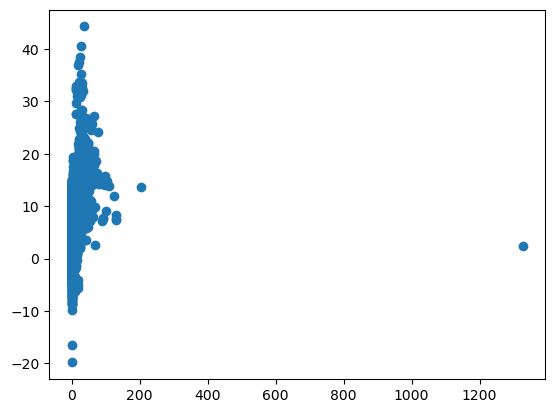

In [51]:
plt.scatter(ytest,lin_p)
plt.show()

In [52]:
df=pd.DataFrame({"Actual":ytest,"Predicted":lin_p})
df

Actual  Predicted
94710   2.752145   2.623431
57327  15.831106  14.021229
33719   0.333333   0.880497
98592   2.926872   3.861997
29886   0.226523  -1.186691
...          ...        ...
32851   0.500000  -0.413378
61387   2.942149   3.333001
42501   1.361989   2.757183
3327    0.502959   3.175634
70727   1.798507   0.182336

[19970 rows x 2 columns]

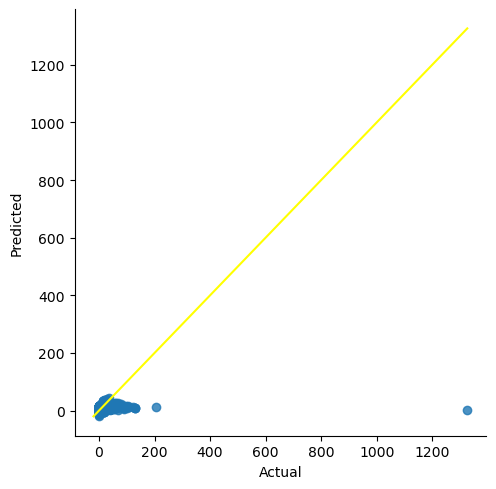

In [53]:
sns.lmplot(x="Actual",y="Predicted",data=df,fit_reg=False) #fit regression
#gives you most fitted two lines.
d_line=np.arange(df.min().min(),df.max().max())
plt.plot(d_line,d_line,color="yellow",linestyle="-")
plt.show()

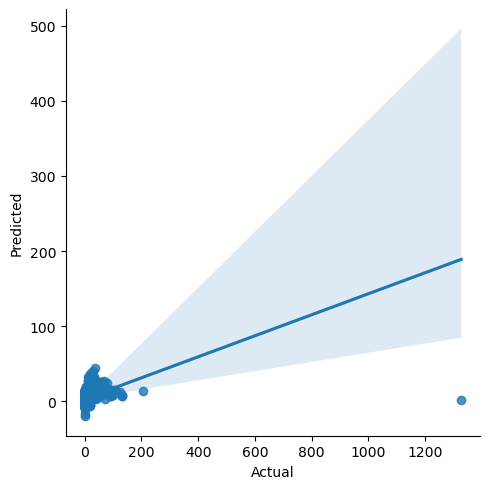

In [54]:
#another syntax for scatterplot
sns.lmplot(data=df,x="Actual",y="Predicted")
plt.show()

# Lasso

In [55]:
from sklearn.linear_model import Lasso
la=Lasso()

In [56]:
la.fit(xtrain,ytrain)

Lasso()

In [57]:
la_p = la.predict(xtest)

In [58]:
la.coef_

array([ 1.72478797e-02,  4.33251674e-01, -3.96811270e-02,  4.02369891e-02,
        1.03358945e-01,  3.59229252e-02,  0.00000000e+00, -1.21441370e-04,
        3.41574982e-02, -4.65971666e-05,  1.98473152e-05])

In [59]:
la.intercept_

-4.972059040007384

In [60]:
df2=pd.DataFrame({"importances":list(la.coef_),"columns":list(x)})
df2

importances             columns
0      0.017248          State_Name
1      0.433252           Crop_Type
2     -0.039681                Crop
3      0.040237                   N
4      0.103359                   P
5      0.035923                   K
6      0.000000                  pH
7     -0.000121            rainfall
8      0.034157         temperature
9     -0.000047    Area_in_hectares
10     0.000020  Production_in_tons

In [61]:
las_r2=la.score(xtrain,ytrain)
las_r2

0.012684128031095643

In [62]:
las_ar2=1-((1-las_r2)*(79879-1))/(79879-11-1)
las_ar2

0.012548146028620866

In [63]:
las_mse=metrics.mean_squared_error(ytest,la_p)
las_mse

128.078775184484

In [64]:
df1=pd.DataFrame({"Actual":ytest,"Predicted":la_p})
df1

Actual  Predicted
94710   2.752145   3.540670
57327  15.831106  13.198936
33719   0.333333  -0.574162
98592   2.926872   5.178882
29886   0.226523   0.116102
...          ...        ...
32851   0.500000   0.568256
61387   2.942149   3.933408
42501   1.361989   0.831418
3327    0.502959   3.227421
70727   1.798507   0.032967

[19970 rows x 2 columns]

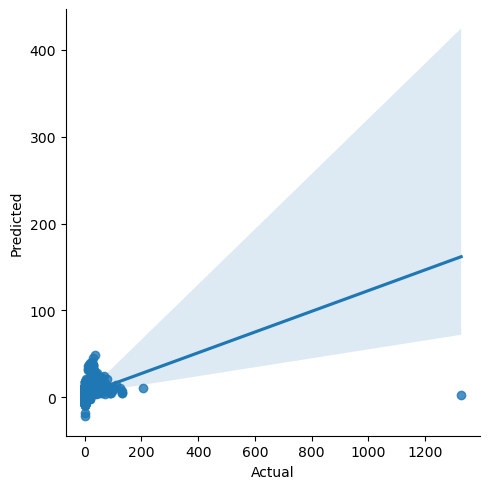

In [65]:
sns.lmplot(data=df1,x="Actual",y="Predicted")
plt.show()

# Ridge

In [66]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [67]:
rd.fit(xtrain,ytrain)

Ridge()

In [68]:
rid_p=rd.predict(xtest)
#rd_p

In [69]:
rd.coef_

array([ 2.51951034e-02,  1.30326744e+00, -2.09951020e-02,  4.56364043e-02,
        1.24930152e-01,  2.57462709e-02,  2.44356619e+00, -4.45376920e-04,
        1.00913018e-01, -4.19738306e-05,  1.78643129e-05])

In [70]:
rd.intercept_

-22.985724832756425

In [71]:
df2=pd.DataFrame({"importances":list(rd.coef_),"columns":list(x)})
df2

importances             columns
0      0.025195          State_Name
1      1.303267           Crop_Type
2     -0.020995                Crop
3      0.045636                   N
4      0.124930                   P
5      0.025746                   K
6      2.443566                  pH
7     -0.000445            rainfall
8      0.100913         temperature
9     -0.000042    Area_in_hectares
10     0.000018  Production_in_tons

In [72]:
rid_r2=rd.score(xtrain,ytrain)
rid_r2

0.014375171064135217

In [73]:
rid_ar2=1-((1-rid_r2)*(79879-1))/(79879-11-1)
rid_ar2

0.014239421967283117

In [74]:
rid_mse=metrics.mean_squared_error(ytest,rid_p)
rid_mse

126.01492263300679

In [75]:
df3=pd.DataFrame({"Actual":ytest,"Predicted":rid_p})
df3

Actual  Predicted
94710   2.752145   2.623464
57327  15.831106  14.021227
33719   0.333333   0.880449
98592   2.926872   3.862048
29886   0.226523  -1.186636
...          ...        ...
32851   0.500000  -0.413346
61387   2.942149   3.333006
42501   1.361989   2.757053
3327    0.502959   3.175619
70727   1.798507   0.182244

[19970 rows x 2 columns]

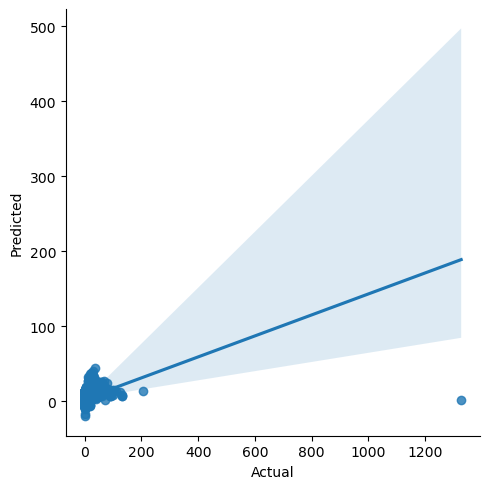

In [76]:
sns.lmplot(data=df3,x="Actual",y="Predicted")
plt.show()

# XGB Regressor

In [77]:
from xgboost import XGBRFRegressor
xgbr=XGBRFRegressor()

In [78]:
xgbr.fit(xtrain,ytrain)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [79]:
xgbr_p=xgbr.predict(xtest)

In [80]:
xgbr_r2=xgbr.score(xtrain,ytrain)
xgbr_r2

0.9507715492346597

In [81]:
n=xtrain.shape[0] #no.of observations
k=xtrain.shape[1] #no. of predictors(features)

In [82]:
xgbr_ar2=1-((1-xgbr_r2)*(n-1))/(n-k-1)
print("Adjusted R square",xgbr_ar2)

Adjusted R square 0.9507647690506235


In [83]:
from sklearn import metrics
xgbr_mse=metrics.mean_squared_error(ytest,xgbr_p)
xgbr_mse

76.43011462004183

# RF Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [85]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [86]:
rf_p=rf.predict(xtest)

In [87]:
rf_r2=rf.score(xtrain,ytrain)
rf_r2

0.8998795059050823

In [88]:
n=xtrain.shape[0] #no.of observations
k=xtrain.shape[1] #no. of predictors(features)

In [89]:
rf_ar2=1-((1-rf_r2)*(n-1))/(n-k-1)
print("Adjusted R square",rf_ar2)

Adjusted R square 0.8998657164121121


In [90]:
from sklearn import metrics
rf_mse=metrics.mean_squared_error(ytest,rf_p)
rf_mse

12.427552161519335

# Comparison of Base Models

In [91]:
l1=["linear","Lasso","Ridge","RF","XGB"]
l2=[lin_r2,las_r2,rid_r2,rf_r2,xgbr_r2]
l3=[lin_ar2,las_ar2,rid_ar2,rf_ar2,xgbr_ar2]
l4=[lin_mse,las_mse,rid_mse,rf_mse,xgbr_mse]

In [92]:
final = pd.DataFrame({"model name":l1,"r2":l2,"ar2":l3,"mse":l4})
final

model name        r2       ar2         mse
0     linear  0.014375  0.014239  126.014928
1      Lasso  0.012684  0.012548  128.078775
2      Ridge  0.014375  0.014239  126.014923
3         RF  0.899880  0.899866   12.427552
4        XGB  0.950772  0.950765   76.430115

# Outlier Treatment

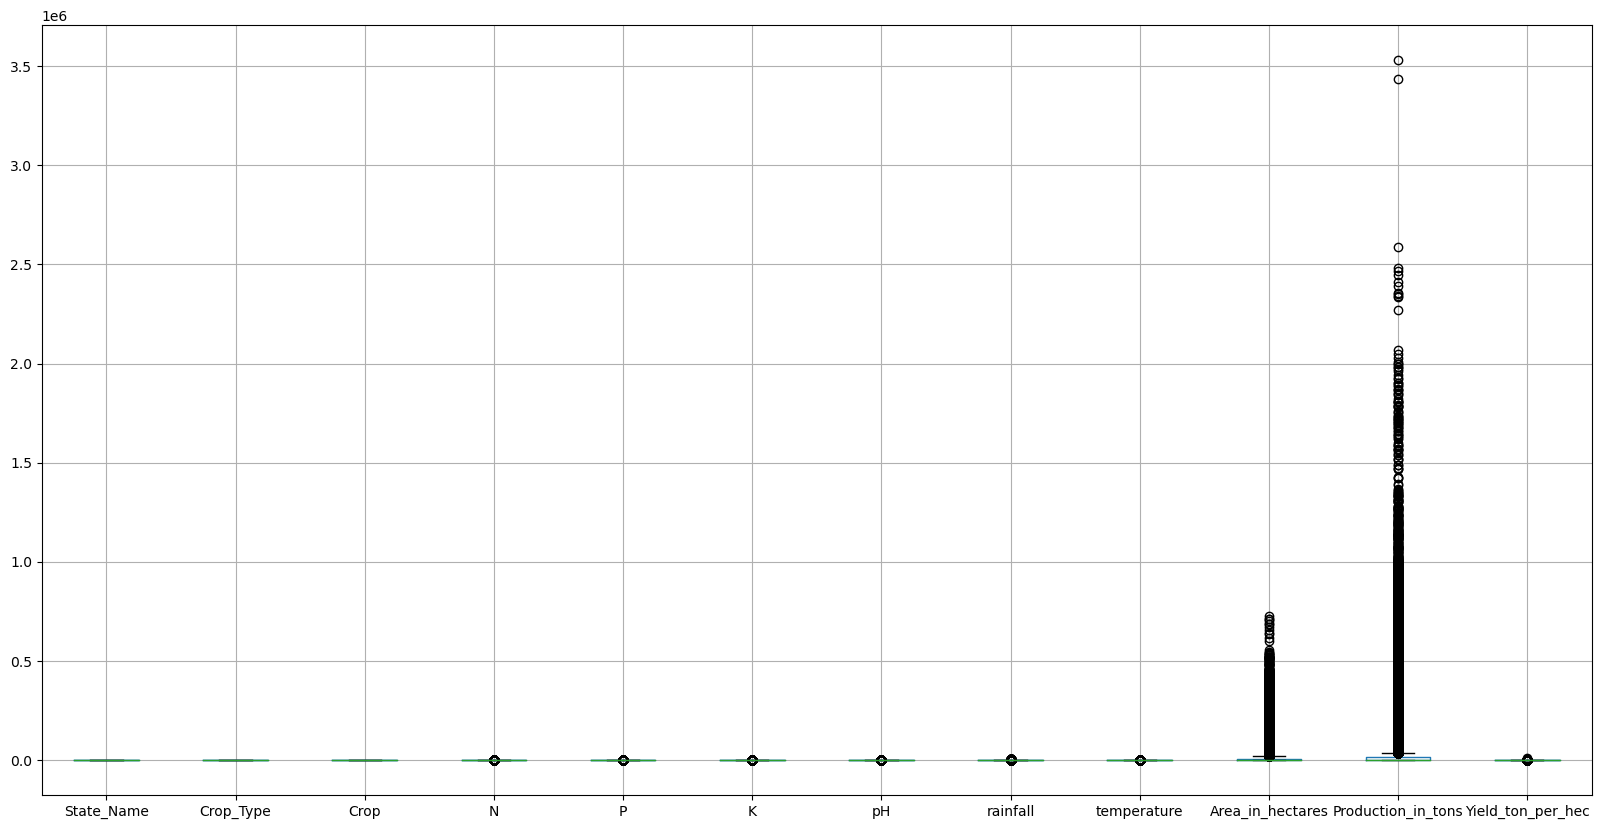

In [93]:
data.boxplot(figsize=(20,10))
plt.show()

In [94]:
#As we are able to see that columns 'Area_in_hectares','Production_in_tons' has more outliers as compare to others.

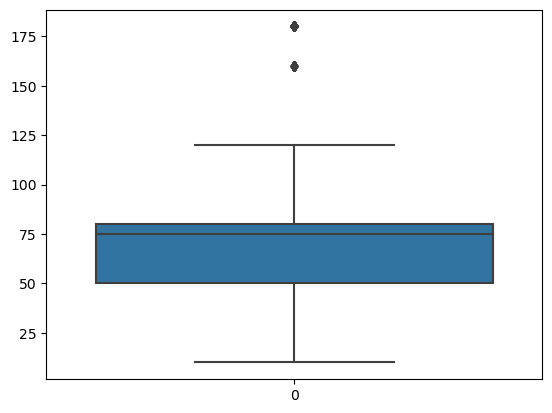

In [95]:
sns.boxplot(data.N)
plt.show()

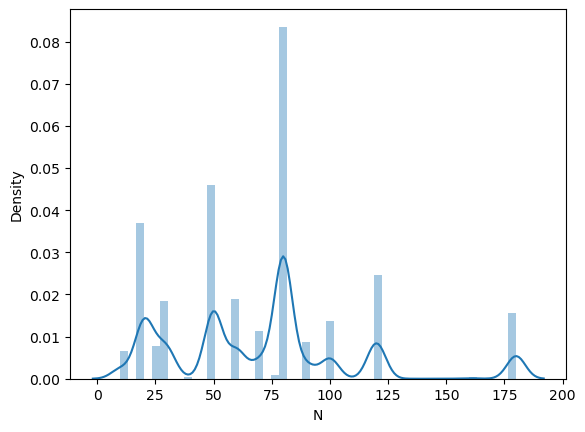

In [96]:
sns.distplot(data.N)
plt.show()

In [97]:
data.N.describe()

count    99849.000000
mean        69.816823
std         39.571469
min         10.000000
25%         50.000000
50%         75.000000
75%         80.000000
max        180.000000
Name: N, dtype: float64

In [98]:
IQR = data.N.quantile(0.75)-data.N.quantile(0.25)
print(IQR)

30.0


In [99]:
l_b = data["N"].quantile(0.25)-(IQR*3)
u_b = data["N"].quantile(0.75)+(IQR*3)
print(l_b)
print(u_b)

-40.0
170.0


In [100]:
data.loc[data["N"]>u_b,"N"]=u_b

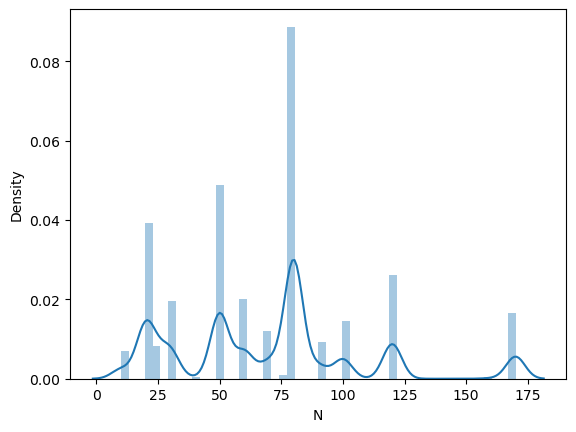

In [101]:
sns.distplot(data.N)
plt.show()

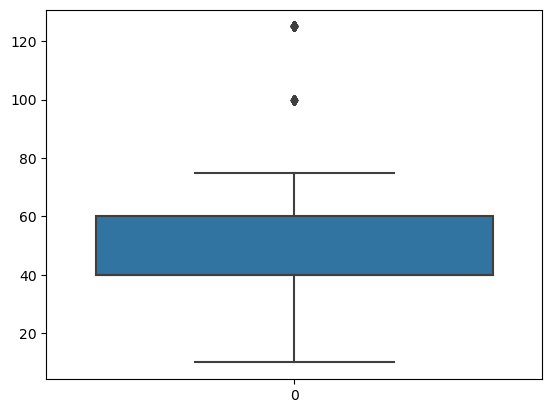

In [102]:
sns.boxplot(data.P)
plt.show()

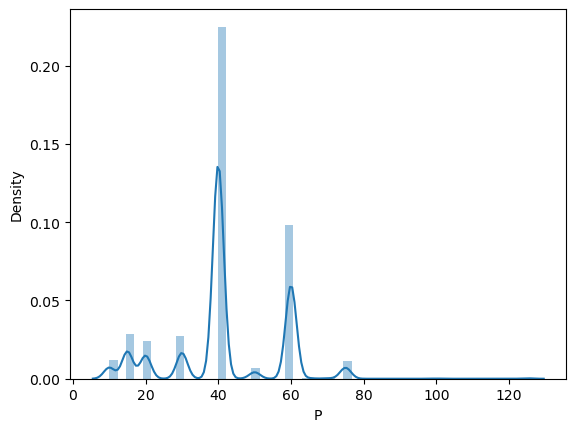

In [103]:
sns.distplot(data.P)
plt.show()

In [104]:
data.P.describe()

count    99849.000000
mean        41.593656
std         15.056508
min         10.000000
25%         40.000000
50%         40.000000
75%         60.000000
max        125.000000
Name: P, dtype: float64

In [105]:
IQR = data.P.quantile(0.75)-data.P.quantile(0.25)
print(IQR)
l_b = data["P"].quantile(0.25)-(IQR*3)
u_b = data["P"].quantile(0.75)+(IQR*3)
print(l_b)
print(u_b)

20.0
-20.0
120.0


In [106]:
data.loc[data["P"]>u_b,"P"]=u_b

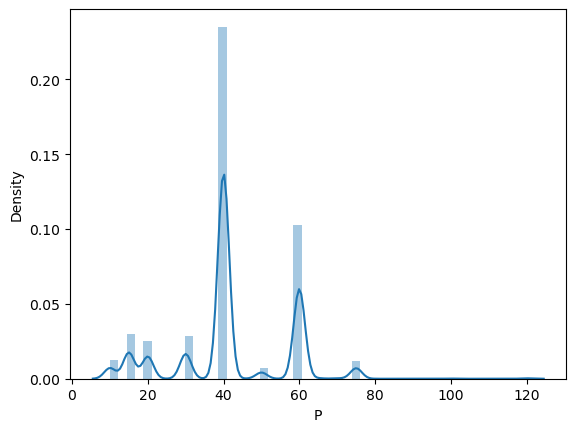

In [107]:
sns.distplot(data.P)
plt.show()

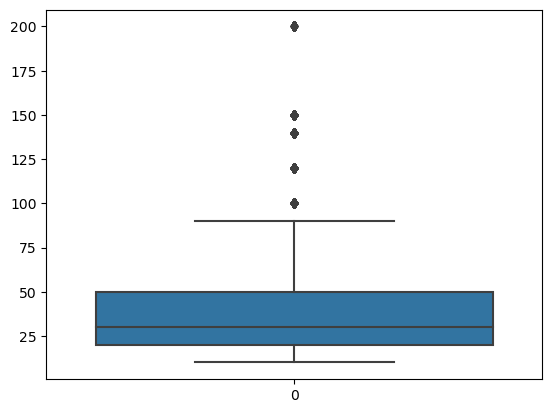

In [108]:
sns.boxplot(data.K)
plt.show()

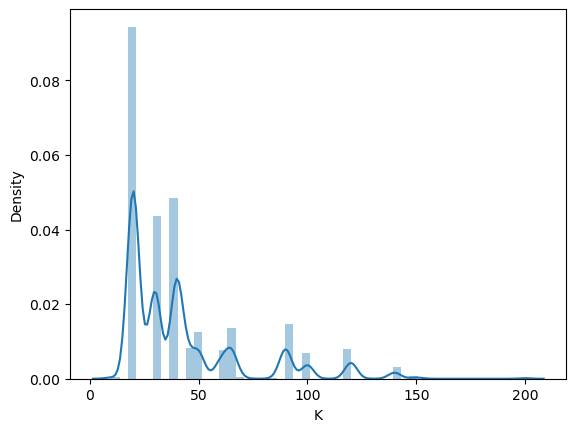

In [109]:
sns.distplot(data.K)
plt.show()

In [110]:
data.K.describe()

count    99849.000000
mean        42.037827
std         28.430263
min         10.000000
25%         20.000000
50%         30.000000
75%         50.000000
max        200.000000
Name: K, dtype: float64

In [111]:
IQR = data.K.quantile(0.75)-data.K.quantile(0.25)
print(IQR)
l_b = data["K"].quantile(0.25)-(IQR*3)
u_b = data["K"].quantile(0.75)+(IQR*3)
print(l_b)
print(u_b)

30.0
-70.0
140.0


In [112]:
data.loc[data["K"]>u_b,"K"]=u_b

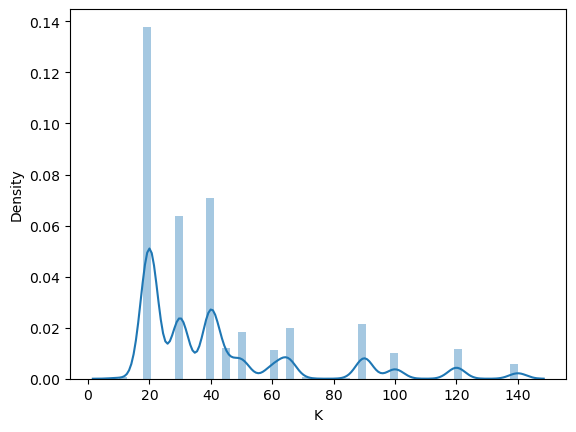

In [113]:
sns.distplot(data.K)
plt.show()

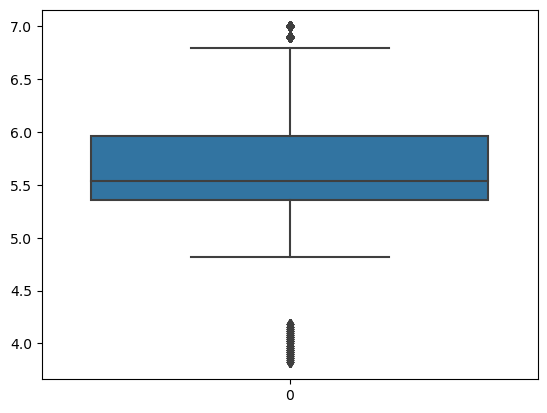

In [114]:
sns.boxplot(data.pH)
plt.show()

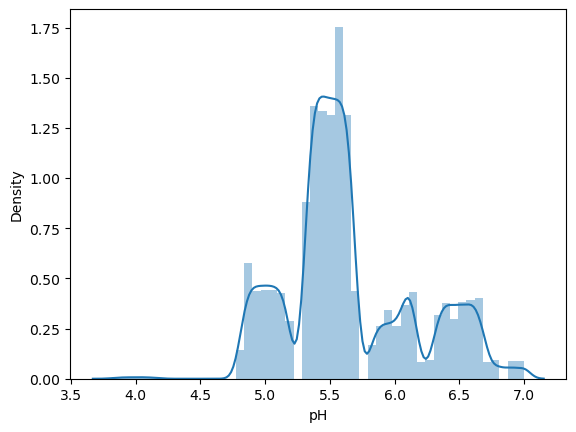

In [115]:
sns.distplot(data.pH)
plt.show()

In [116]:
data.pH.describe()

count    99849.000000
mean         5.643624
std          0.505283
min          3.820000
25%          5.360000
50%          5.540000
75%          5.960000
max          7.000000
Name: pH, dtype: float64

In [117]:
IQR = data.pH.quantile(0.75)-data.pH.quantile(0.25)
print(IQR)
l_b = data["pH"].quantile(0.25)-(IQR*3)
u_b = data["pH"].quantile(0.75)+(IQR*3)
print(l_b)
print(u_b)

0.5999999999999996
3.5600000000000014
7.759999999999999


In [118]:
data.loc[data["pH"]>u_b,"pH"]=u_b

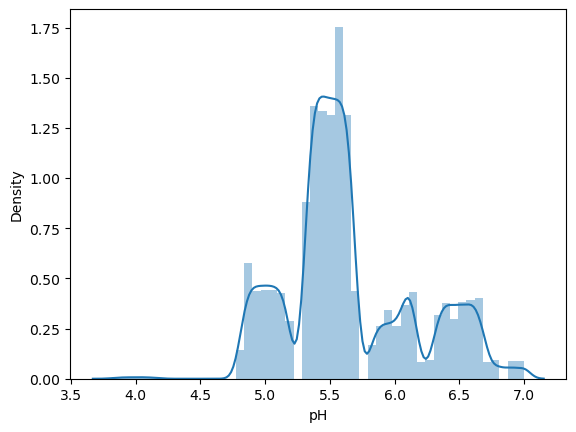

In [119]:
sns.distplot(data.pH)
plt.show()


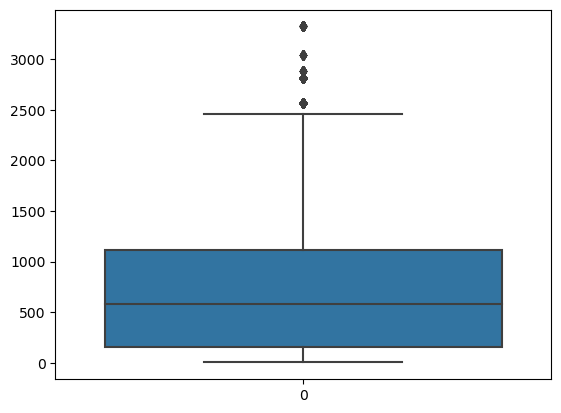

In [120]:
sns.boxplot(data.rainfall)
plt.show()

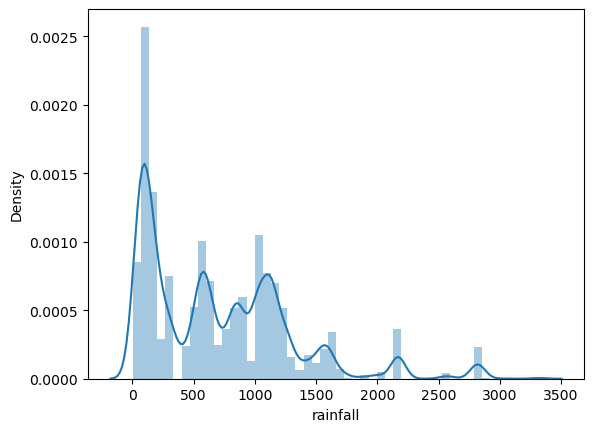

In [121]:
sns.distplot(data.rainfall)
plt.show()

In [122]:
data.rainfall.describe()

count    99849.000000
mean       701.151085
std        604.701552
min          3.274569
25%        157.310000
50%        579.750000
75%       1110.780000
max       3322.060000
Name: rainfall, dtype: float64

In [123]:
IQR = data.rainfall.quantile(0.75)-data.rainfall.quantile(0.25)
print(IQR)
l_b = data["rainfall"].quantile(0.25)-(IQR*3)
u_b = data["rainfall"].quantile(0.75)+(IQR*3)
print(l_b)
print(u_b)

953.47
-2703.1
3971.1899999999996


In [124]:
data.loc[data["rainfall"]>u_b,"rainfall"]=u_b

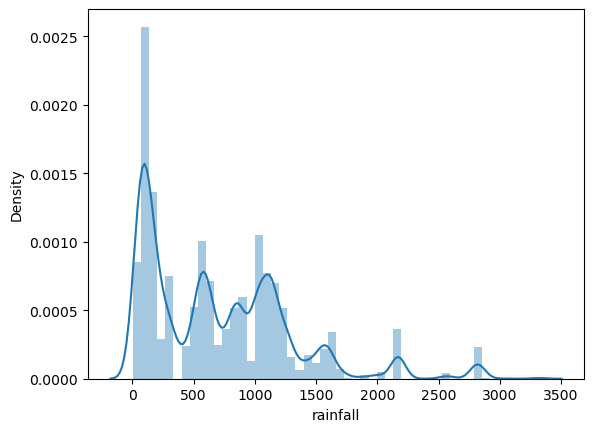

In [125]:
sns.distplot(data.rainfall)
plt.show()

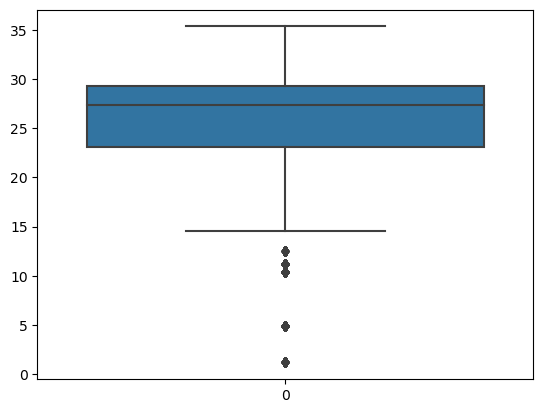

In [126]:
sns.boxplot(data.temperature)
plt.show()

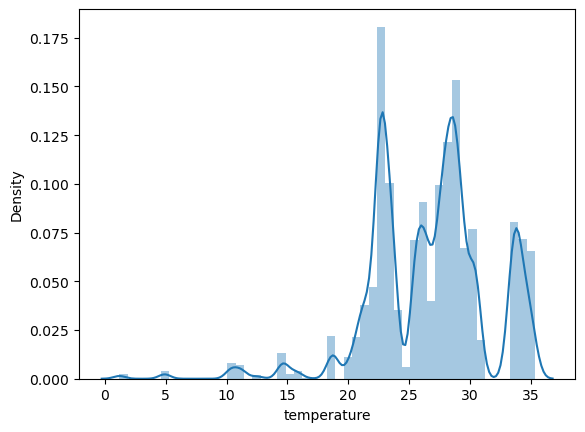

In [127]:
sns.distplot(data.temperature)
plt.show()

In [128]:
data.temperature.describe()

count    99849.000000
mean        26.684154
std          4.851214
min          1.180000
25%         23.106000
50%         27.333333
75%         29.266667
max         35.346667
Name: temperature, dtype: float64

In [129]:
IQR = data.temperature.quantile(0.75)-data.temperature.quantile(0.25)
print(IQR)
l_b = data["temperature"].quantile(0.25)-(IQR*3)
u_b = data["temperature"].quantile(0.75)+(IQR*3)
print(l_b)
print(u_b)

6.160666666666668
4.623999999999999
47.74866666666667


In [130]:
data.loc[data["temperature"]>u_b,"temperature"]=u_b

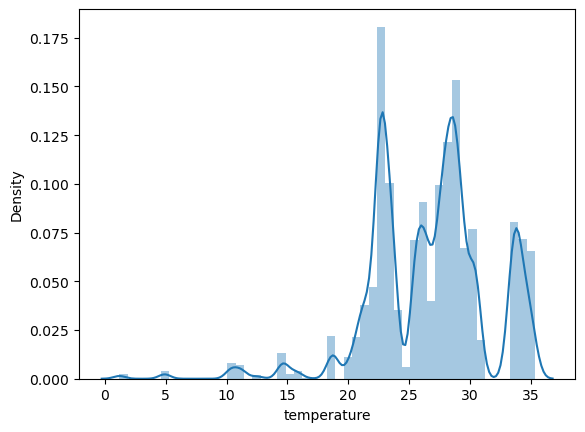

In [131]:
sns.distplot(data.temperature)
plt.show()

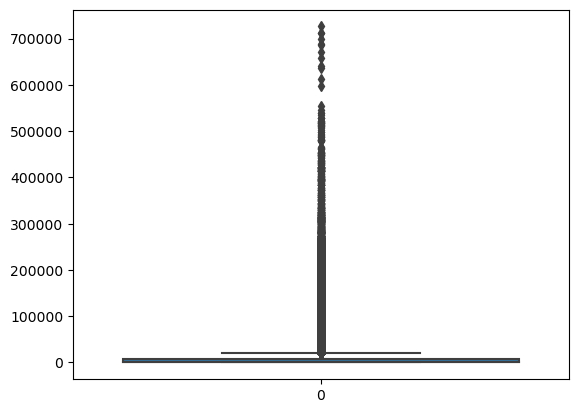

In [132]:
sns.boxplot(data.Area_in_hectares)
plt.show()

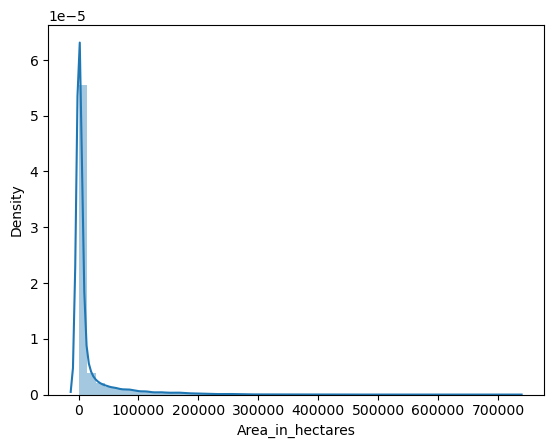

In [133]:
sns.distplot(data.Area_in_hectares)
plt.show()

In [134]:
data.Area_in_hectares.describe()

count     99849.000000
mean      16476.585668
std       43604.268231
min           0.580000
25%         130.000000
50%        1010.000000
75%        8099.000000
max      726300.000000
Name: Area_in_hectares, dtype: float64

In [135]:
IQR = data.Area_in_hectares.quantile(0.75)-data.Area_in_hectares.quantile(0.25)
print(IQR)
l_b = data["Area_in_hectares"].quantile(0.25)-(IQR*3)
u_b = data["Area_in_hectares"].quantile(0.75)+(IQR*3)
print(l_b)
print(u_b)

7969.0
-23777.0
32006.0


In [136]:
data.loc[data["Area_in_hectares"]>u_b,"Area_in_hectares"]=u_b

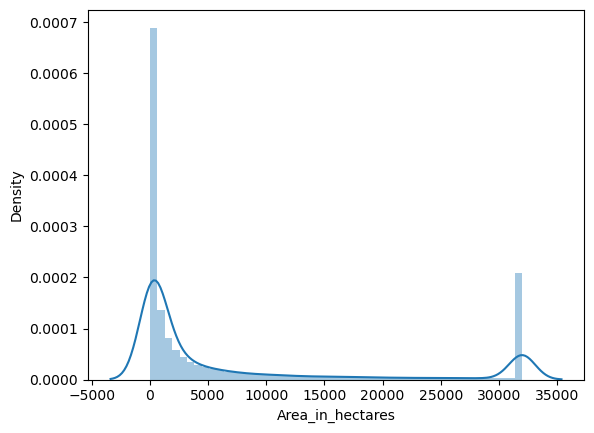

In [137]:
sns.distplot(data.Area_in_hectares)
plt.show()

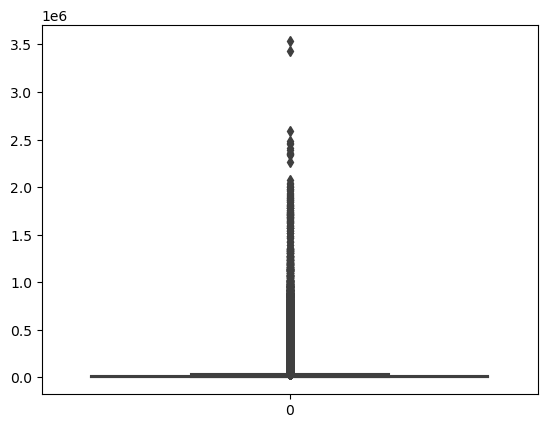

In [138]:
sns.boxplot(data.Production_in_tons)
plt.show()

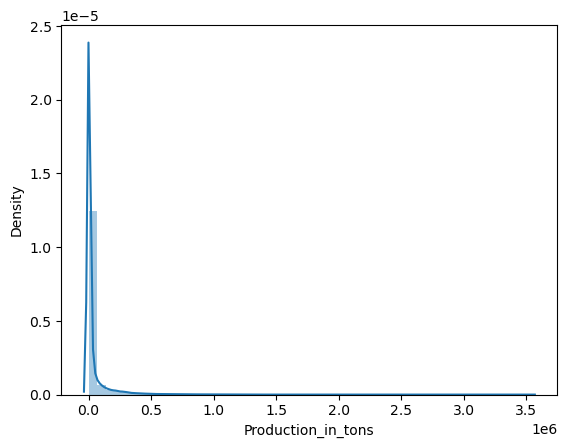

In [139]:
sns.distplot(data.Production_in_tons)
plt.show()

In [140]:
data.Production_in_tons.describe

<bound method NDFrame.describe of 0          9400.0
1          1000.0
2         10200.0
3          4900.0
4           500.0
           ...   
99844      5152.0
99845       391.0
99846       281.0
99847    261435.0
99848        95.0
Name: Production_in_tons, Length: 99849, dtype: float64>

In [141]:
IQR = data.Production_in_tons.quantile(0.75)-data.Production_in_tons.quantile(0.25)
print(IQR)
l_b = data["Production_in_tons"].quantile(0.25)-(IQR*3)
u_b = data["Production_in_tons"].quantile(0.75)+(IQR*3)
print(l_b)
print(u_b)

14233.0
-42537.0
57094.0


In [142]:
data.loc[data["Production_in_tons"]>u_b,"Production_in_tons"]=u_b

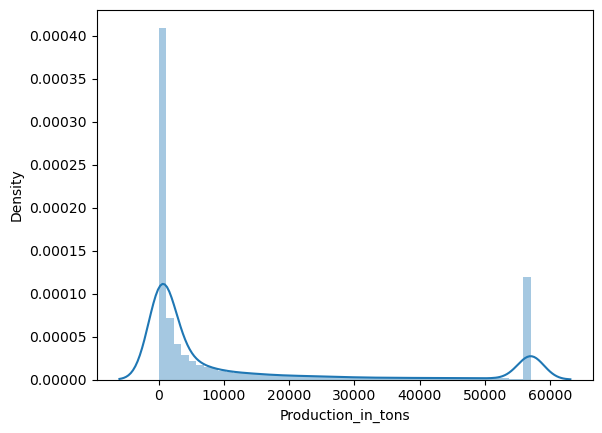

In [143]:
sns.distplot(data.Production_in_tons)
plt.show()

# Skewness Treatment

In [144]:
data.skew()

State_Name             -0.128899
Crop_Type               0.476933
Crop                   -0.776094
N                       0.742202
P                       0.091633
K                       1.655667
pH                      0.571347
rainfall                1.144965
temperature            -0.764792
Area_in_hectares        1.494234
Production_in_tons      1.488510
Yield_ton_per_hec     247.605260
dtype: float64

In [145]:
data["N"]=np.cbrt(data["N"])
data["K"]=np.cbrt(data["K"])
data["pH"]=np.cbrt(data["pH"])
data["rainfall"]=np.cbrt(data["rainfall"])
data["temperature"]=np.cbrt(data["temperature"])
data["Area_in_hectares"]=np.cbrt(data["Area_in_hectares"])
data["Production_in_tons"]=np.cbrt(data["Production_in_tons"])
data["Yield_ton_per_hec"]=np.cbrt(data["Yield_ton_per_hec"])

In [146]:
data.skew()

State_Name           -0.128899
Crop_Type             0.476933
Crop                 -0.776094
N                    -0.229796
P                     0.091633
K                     0.992656
pH                    0.420795
rainfall             -0.102048
temperature          -2.524726
Area_in_hectares      0.727675
Production_in_tons    0.727106
Yield_ton_per_hec     1.922677
dtype: float64

# Data Visualization

In [147]:
data.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

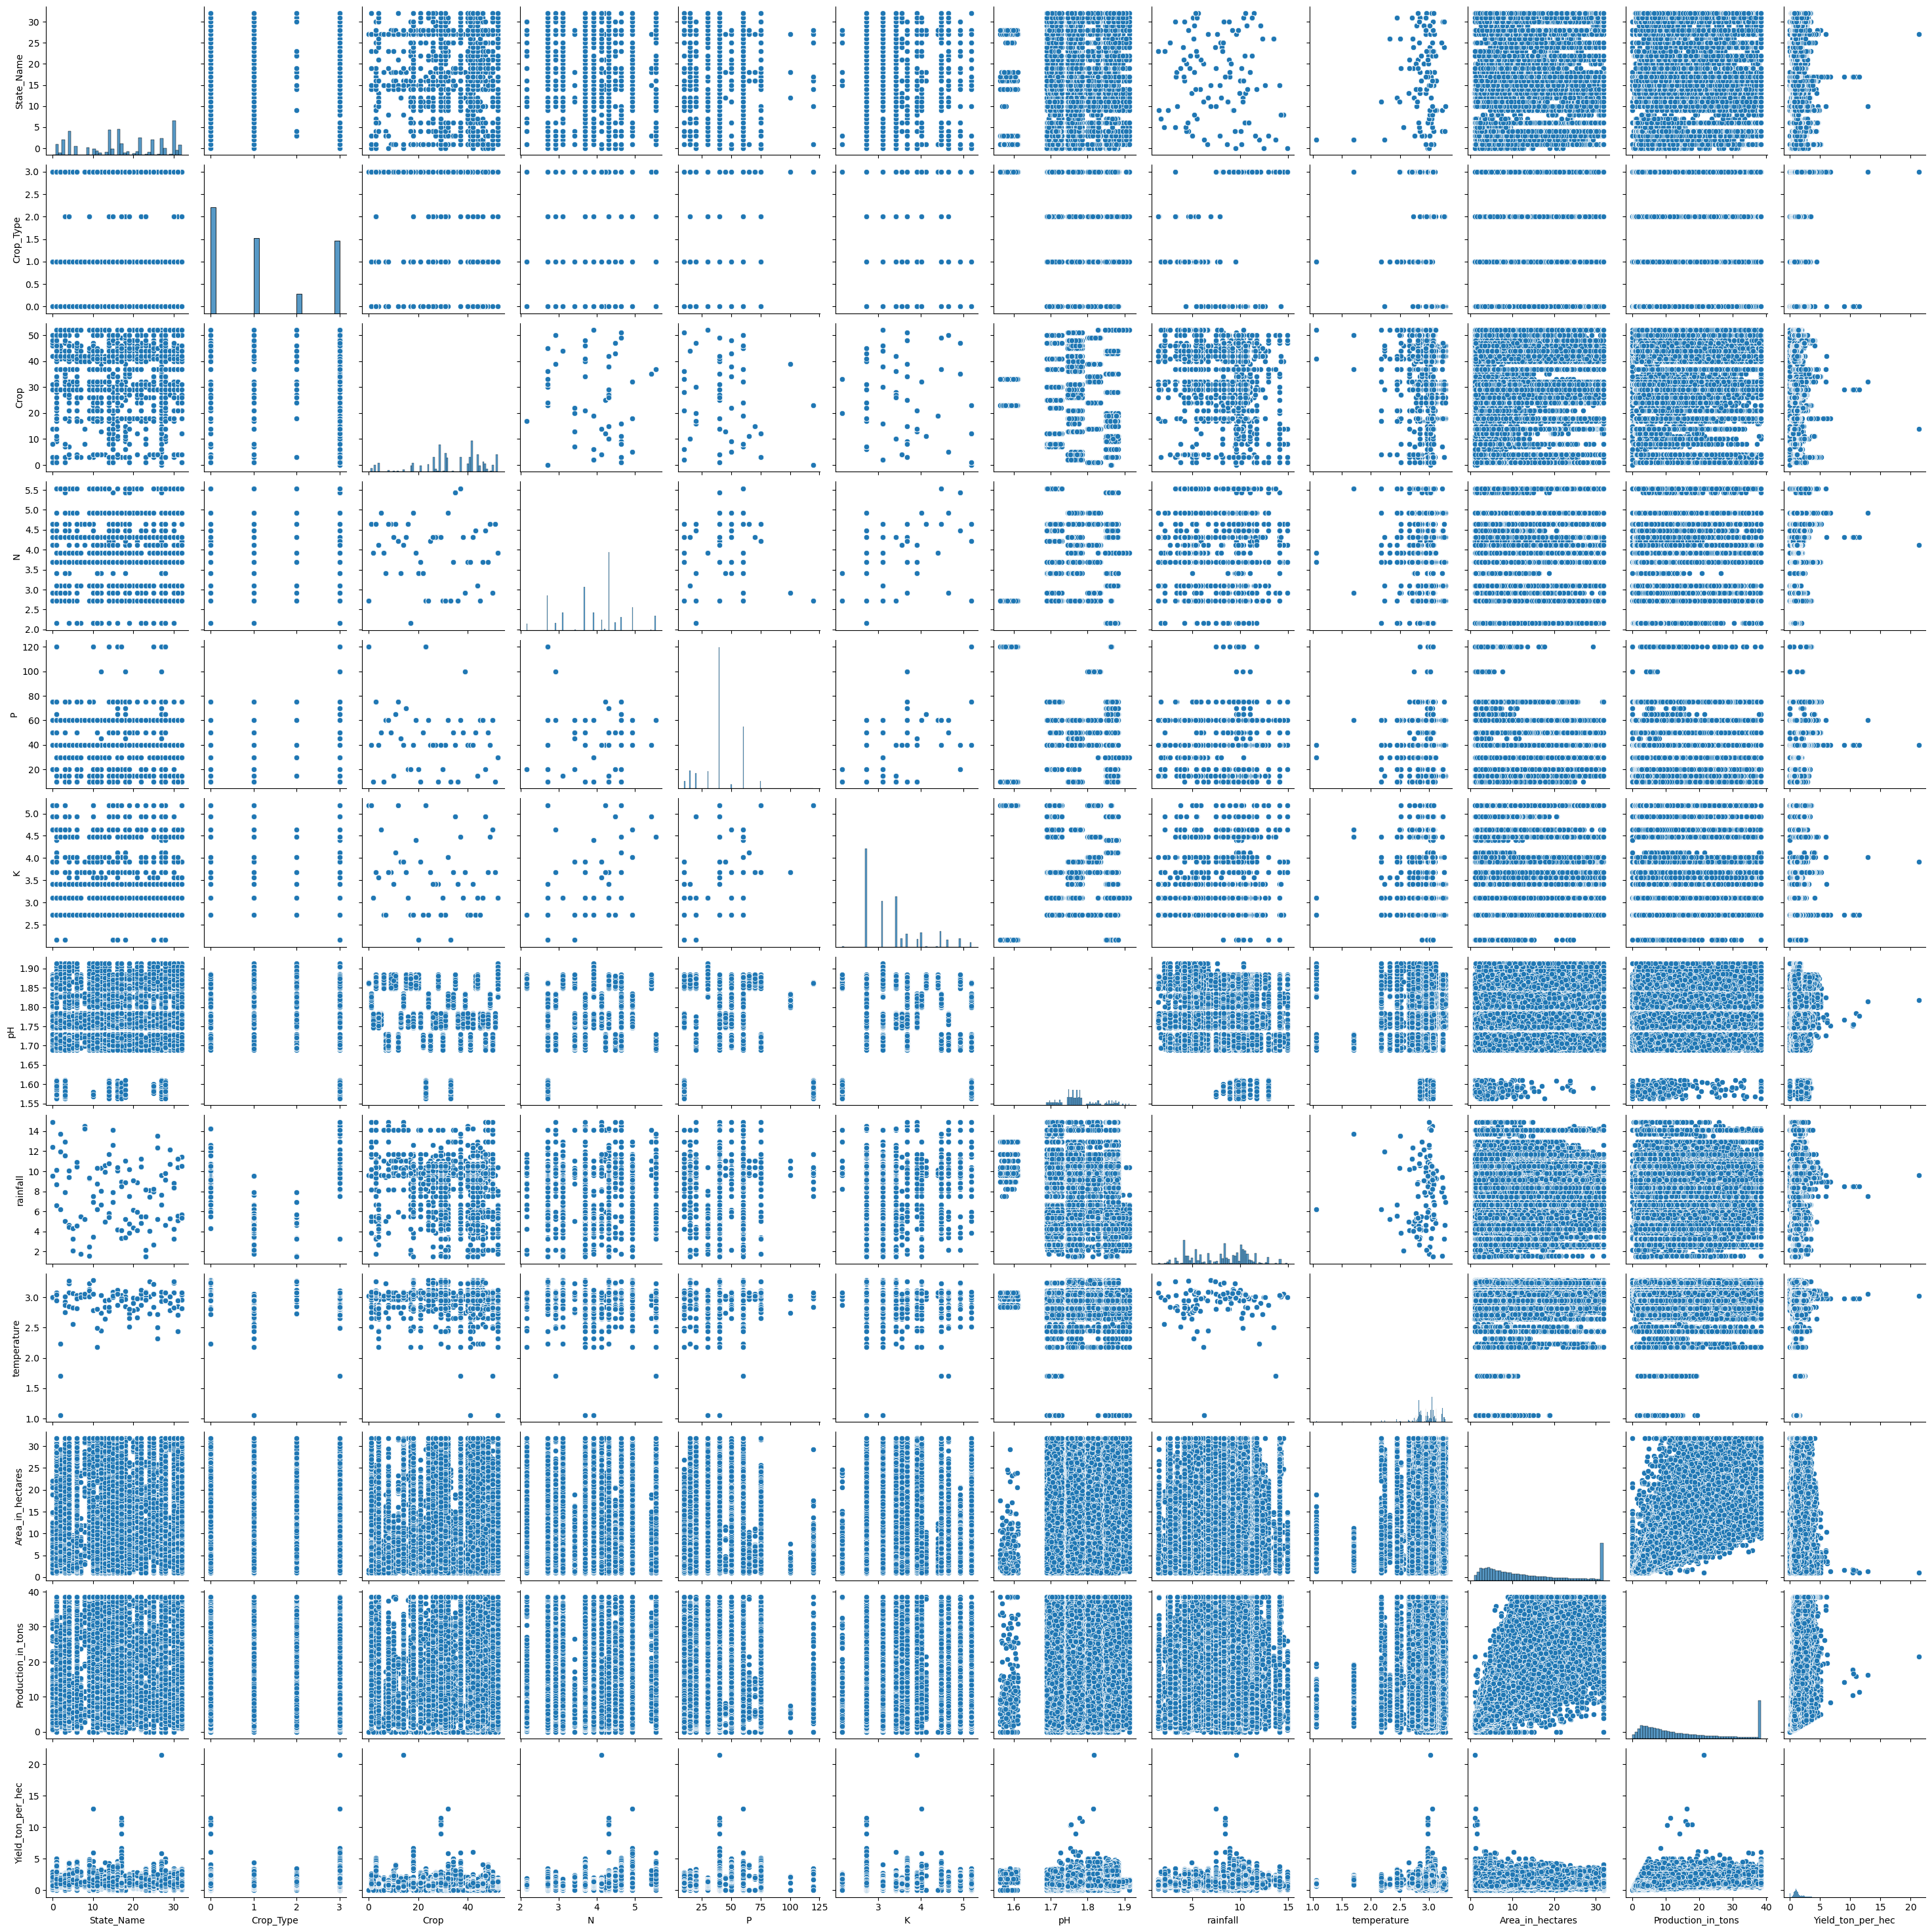

In [148]:
sns.pairplot(data)

Text(0.5, 1.02, 'Feature Distribution')

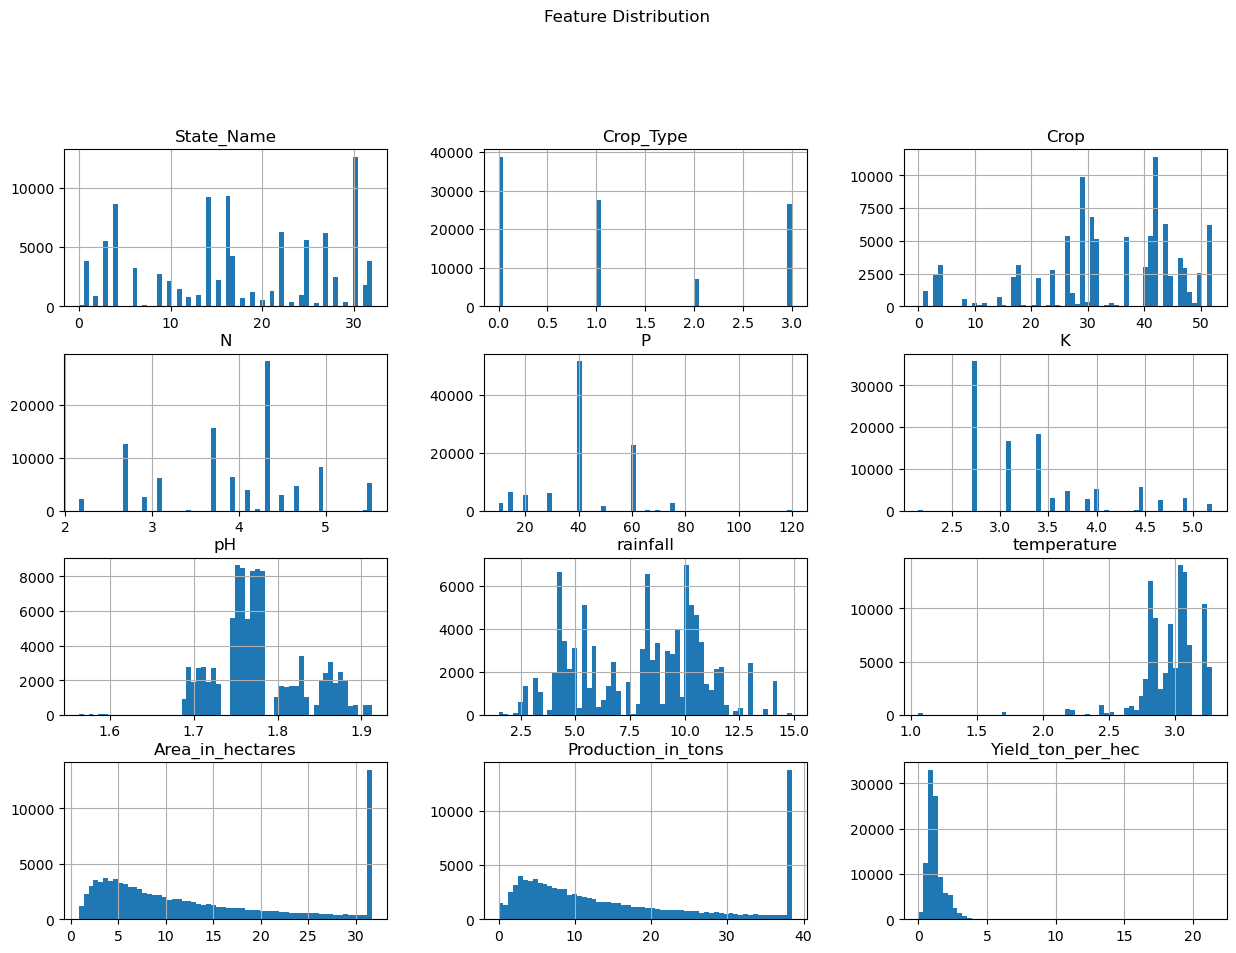

In [149]:
#check the distribution of dataset features
data.hist(bins=60,figsize=(15,10))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

<Axes: xlabel='State_Name', ylabel='count'>

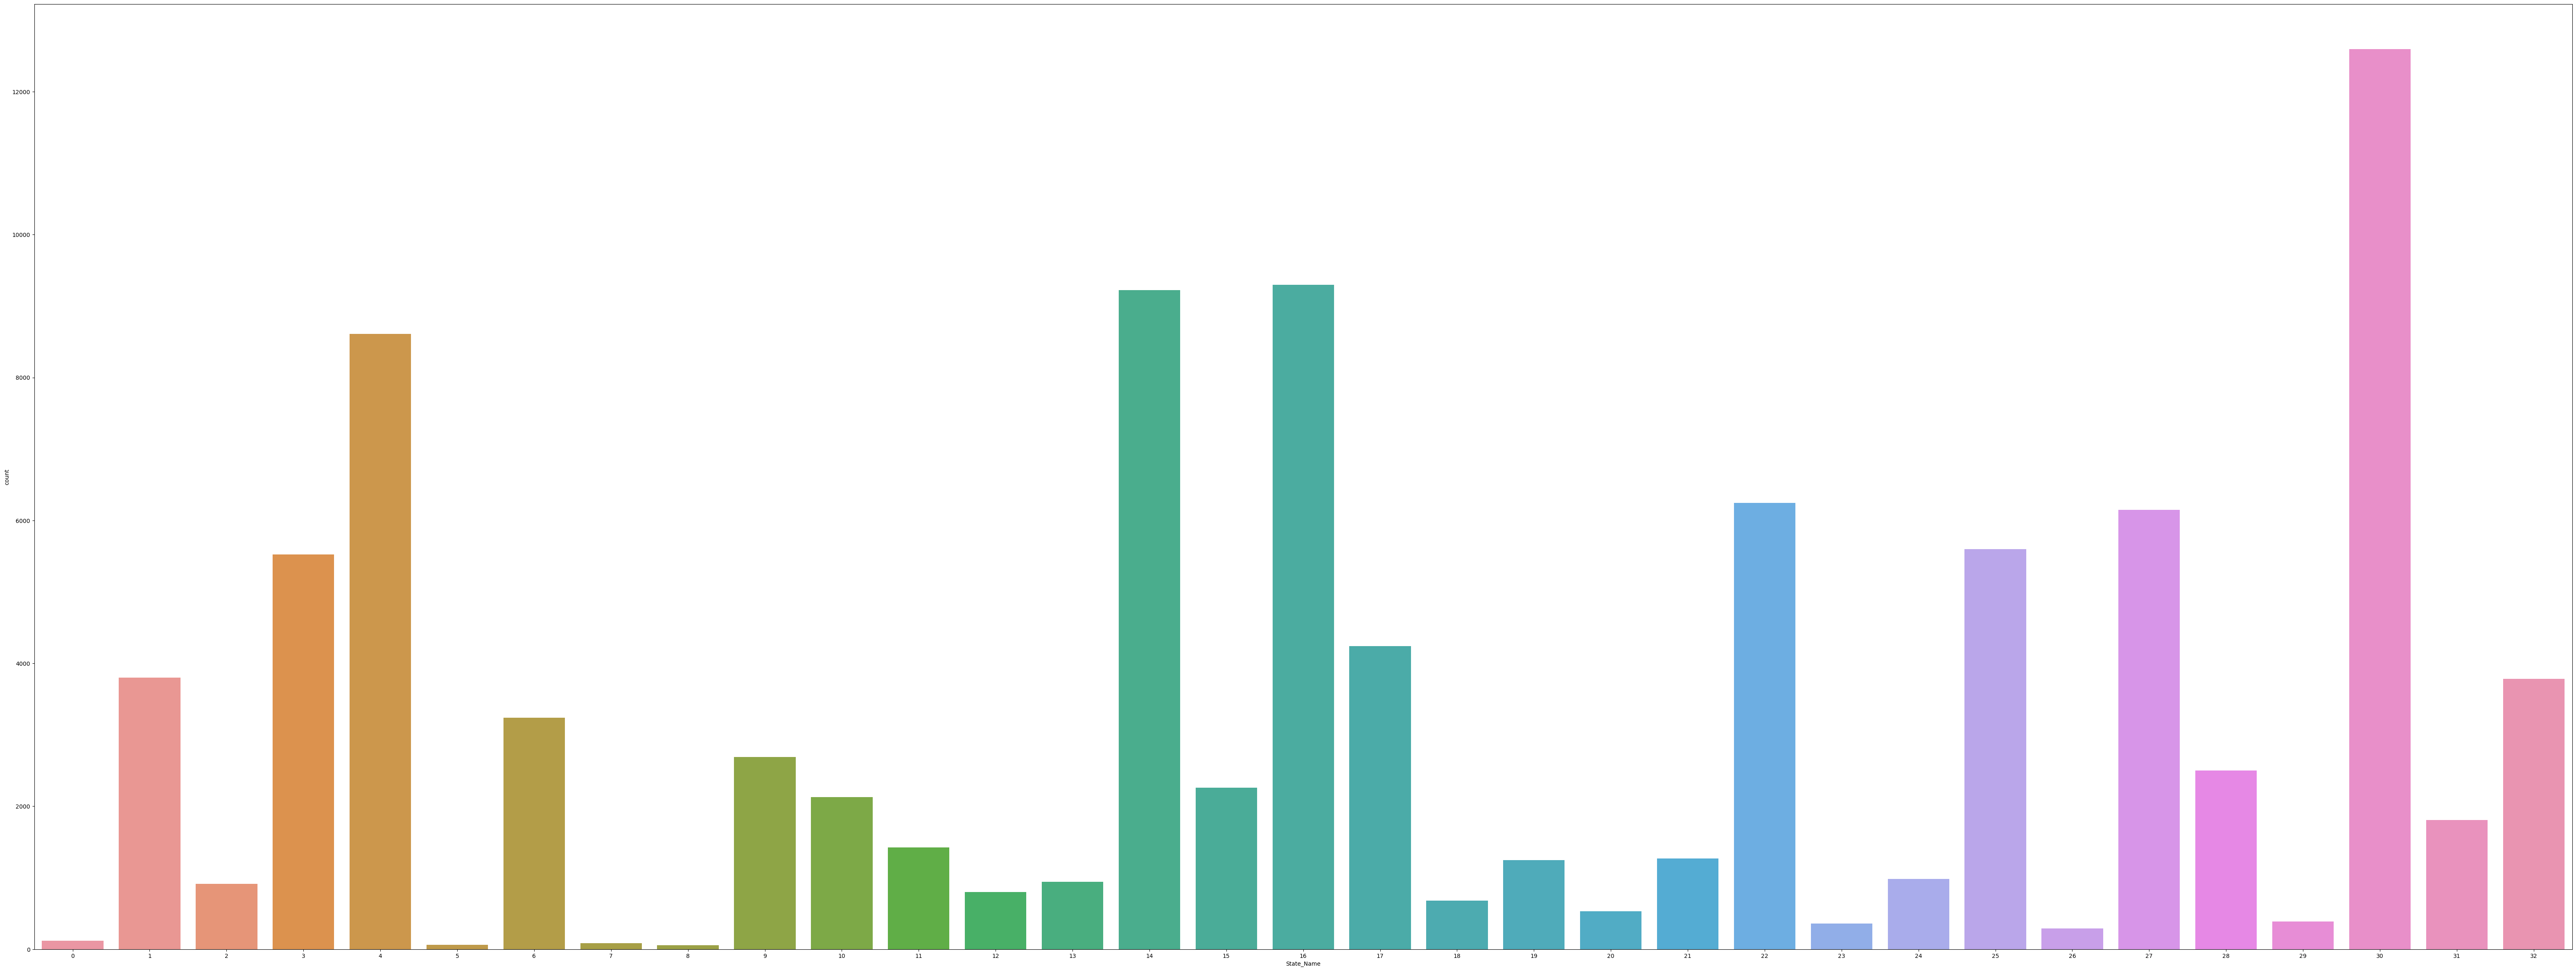

In [150]:
#create countplot for State_Name column
plt.figure(figsize=(80,30))
sns.countplot(x='State_Name',data=data)

Text(0.5, 1.0, 'Crop vs Production_in_tons')

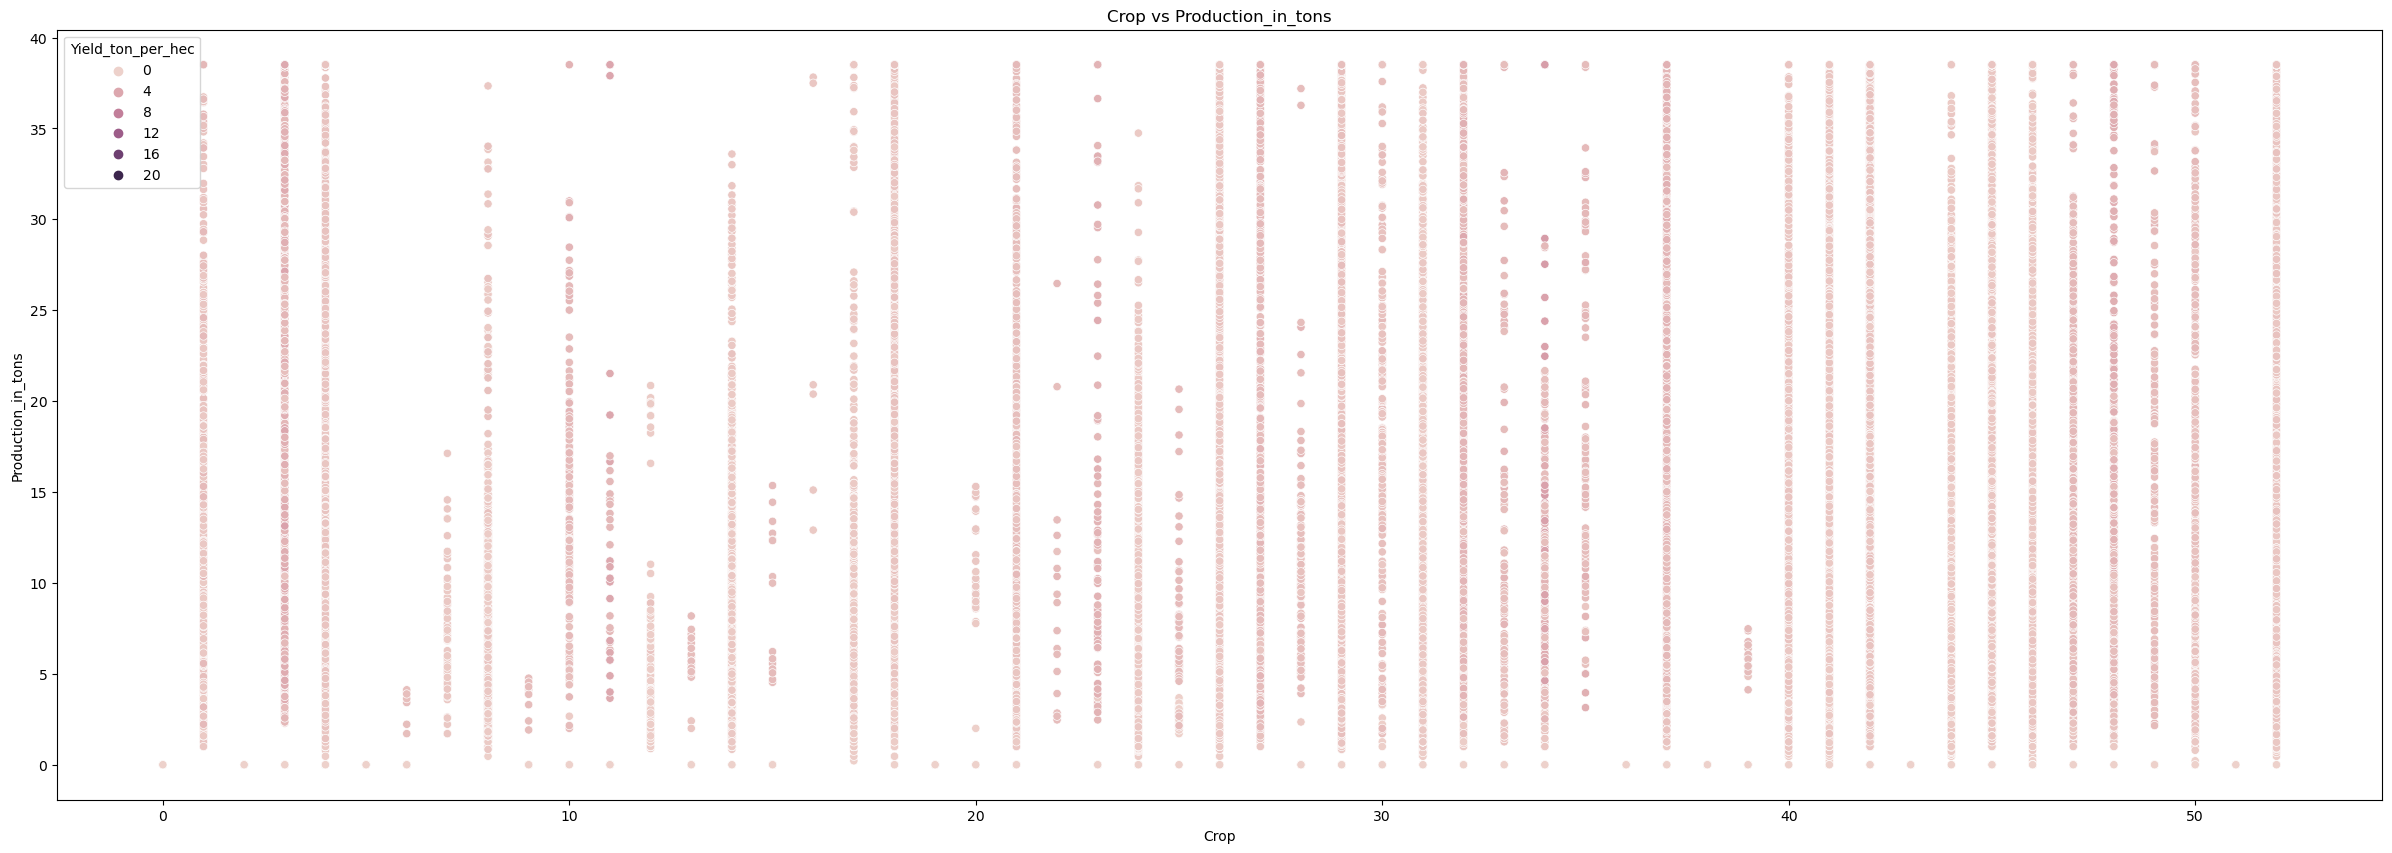

In [151]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=data['Crop'],y=data['Production_in_tons'],hue='Yield_ton_per_hec',data=data)
plt.title('Crop vs Production_in_tons')

<Axes: xlabel='Crop', ylabel='count'>

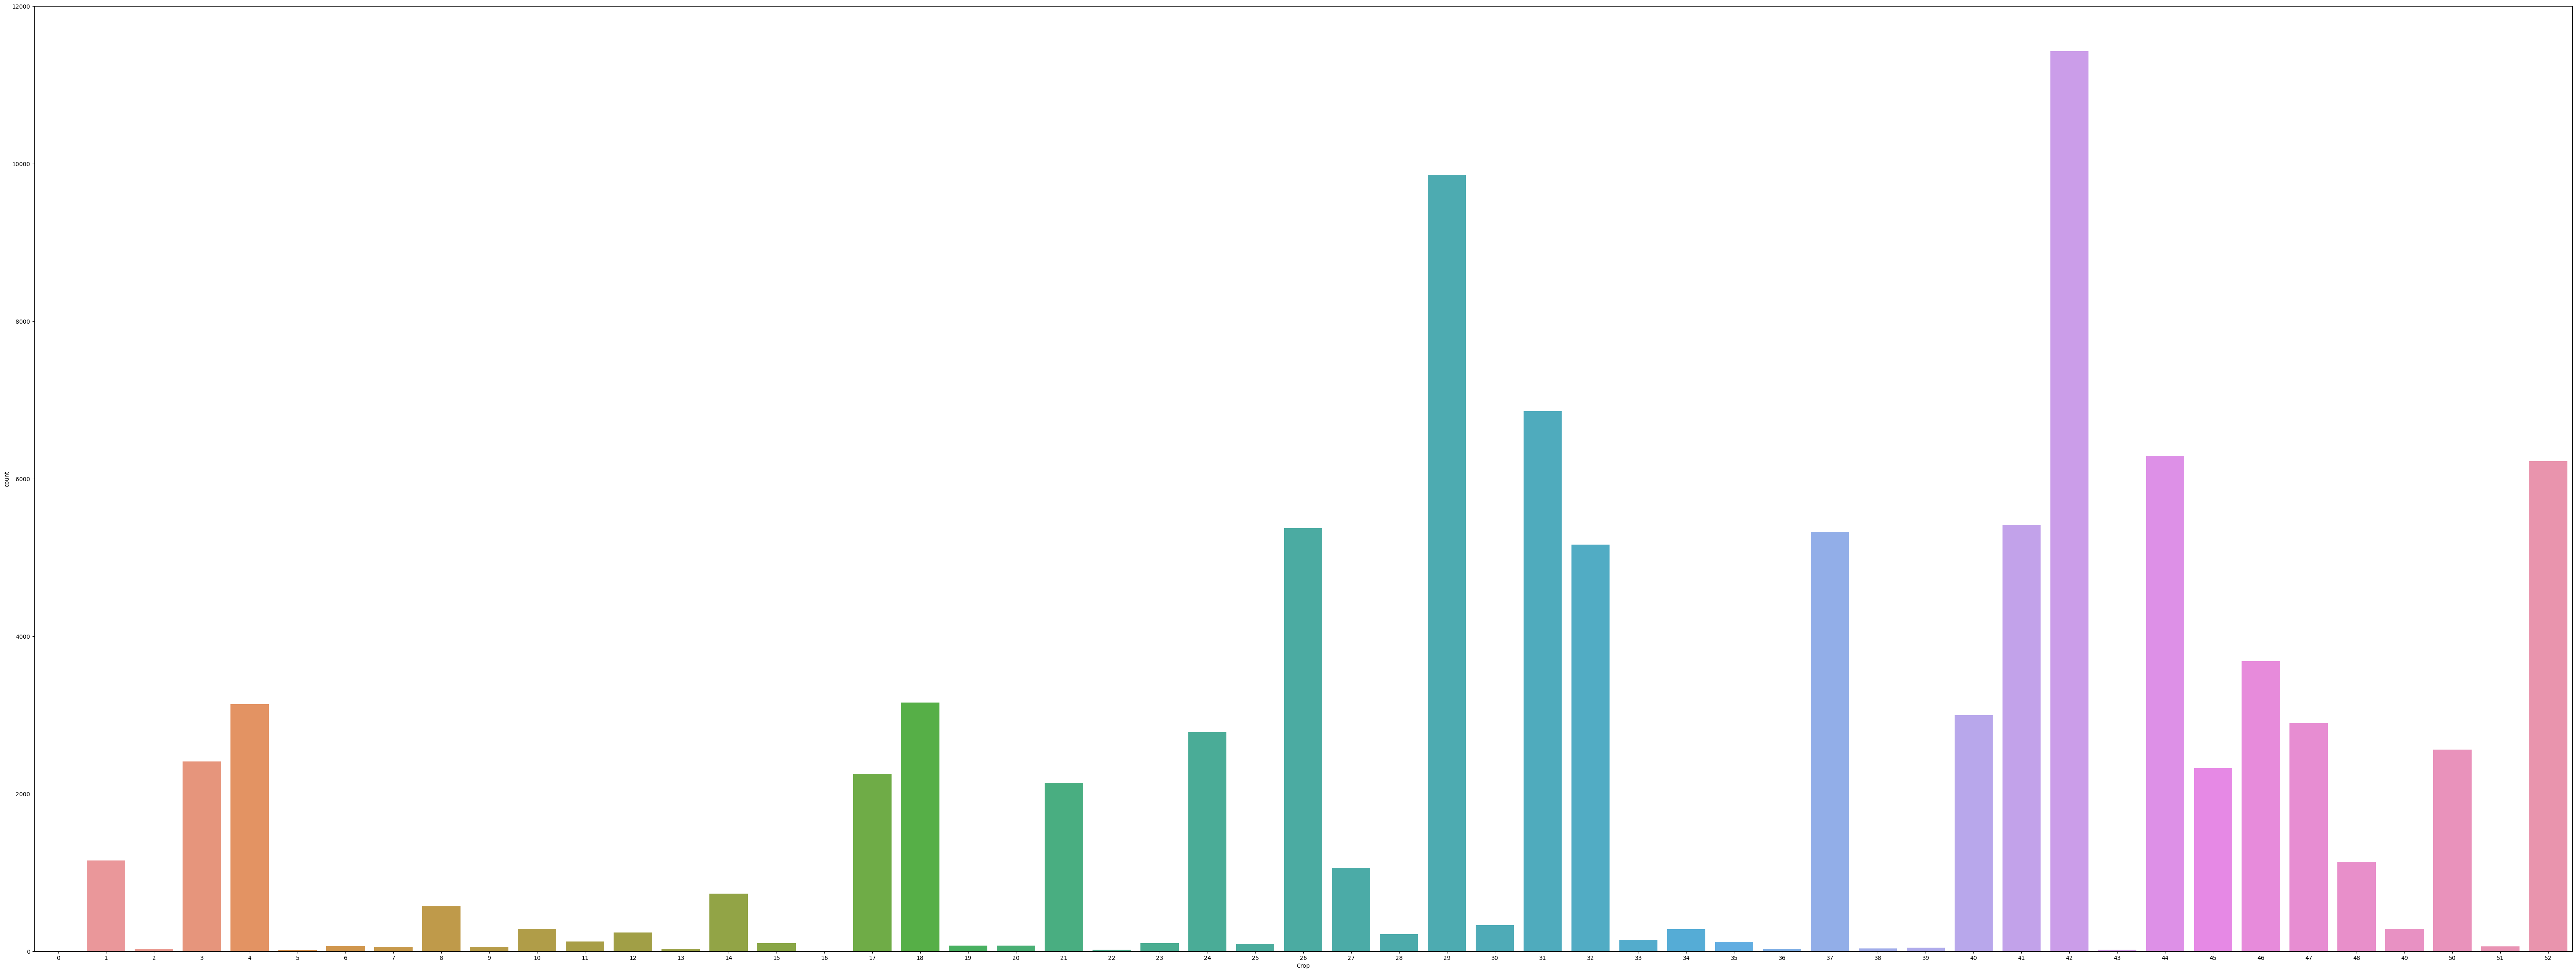

In [152]:
plt.figure(figsize=(80,30))
sns.countplot(x='Crop',data=data)

<Axes: xlabel='Crop_Type', ylabel='count'>

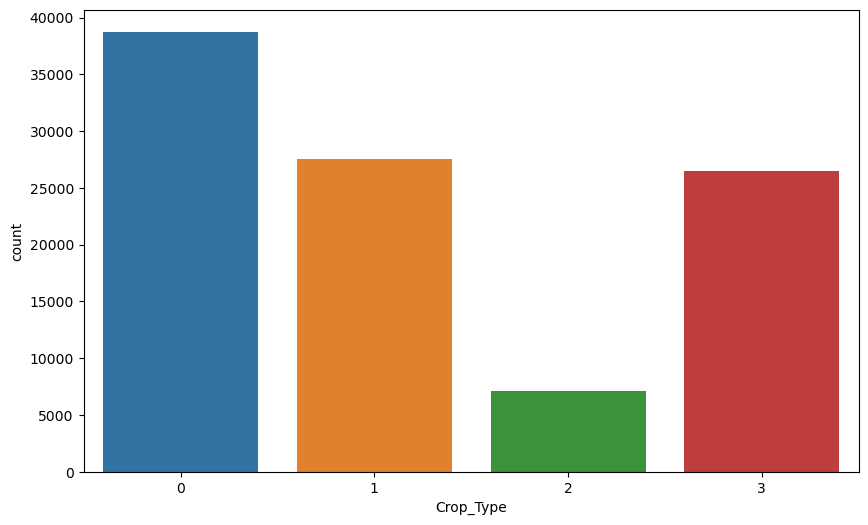

In [153]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop_Type',data=data)

# Correlation

In [154]:
#correlation of dataframe between all columns
import seaborn as sns
data_c=data.corr()
data_c

State_Name  Crop_Type      Crop         N         P  \
State_Name            1.000000  -0.051421  0.001750 -0.026253 -0.031071   
Crop_Type            -0.051421   1.000000 -0.161014  0.158354  0.130086   
Crop                  0.001750  -0.161014  1.000000 -0.145475 -0.151748   
N                    -0.026253   0.158354 -0.145475  1.000000  0.281903   
P                    -0.031071   0.130086 -0.151748  0.281903  1.000000   
K                    -0.034965   0.544134 -0.008125  0.491651  0.211037   
pH                    0.002135  -0.015679 -0.080187 -0.214440 -0.250672   
rainfall             -0.207889   0.207494 -0.143614  0.053373  0.091475   
temperature           0.147477  -0.098056 -0.054205 -0.047517 -0.047745   
Area_in_hectares      0.022857  -0.293245  0.171114  0.084719 -0.065898   
Production_in_tons    0.022009  -0.116516  0.127474  0.313009  0.087620   
Yield_ton_per_hec     0.013406   0.373677 -0.060621  0.540160  0.359930   

                           K        pH  rainfall  temperature  \
State_Name         -0.034965  0.002135 -0.207889     0.147477   
Crop_Type           0.544134 -0.015679  0.207494    -0.098056   
Crop               -0.008125 -0.080187 -0.143614    -0.054205   
N                   0.491651 -0.214440  0.053373    -0.047517   
P                   0.211037 -0.250672  0.091475    -0.047745   
K                   1.000000 -0.198835  0.314149    -0.070918   
pH                 -0.198835  1.000000 -0.019316     0.017386   
rainfall            0.314149 -0.019316  1.000000     0.135079   
temperature        -0.070918  0.017386  0.135079     1.000000   
Area_in_hectares   -0.180929  0.046424 -0.147822    -0.004461   
Production_in_tons  0.027829  0.003825 -0.098597    -0.021164   
Yield_ton_per_hec   0.507526 -0.090558  0.102942    -0.035395   

                    Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
State_Name                  0.022857            0.022009           0.013406  
Crop_Type                  -0.293245           -0.116516           0.373677  
Crop                        0.171114            0.127474          -0.060621  
N                           0.084719            0.313009           0.540160  
P                          -0.065898            0.087620           0.359930  
K                          -0.180929            0.027829           0.507526  
pH                          0.046424            0.003825          -0.090558  
rainfall                   -0.147822           -0.098597           0.102942  
temperature                -0.004461           -0.021164          -0.035395  
Area_in_hectares            1.000000            0.887157          -0.060102  
Production_in_tons          0.887157            1.000000           0.324576  
Yield_ton_per_hec          -0.060102            0.324576           1.000000

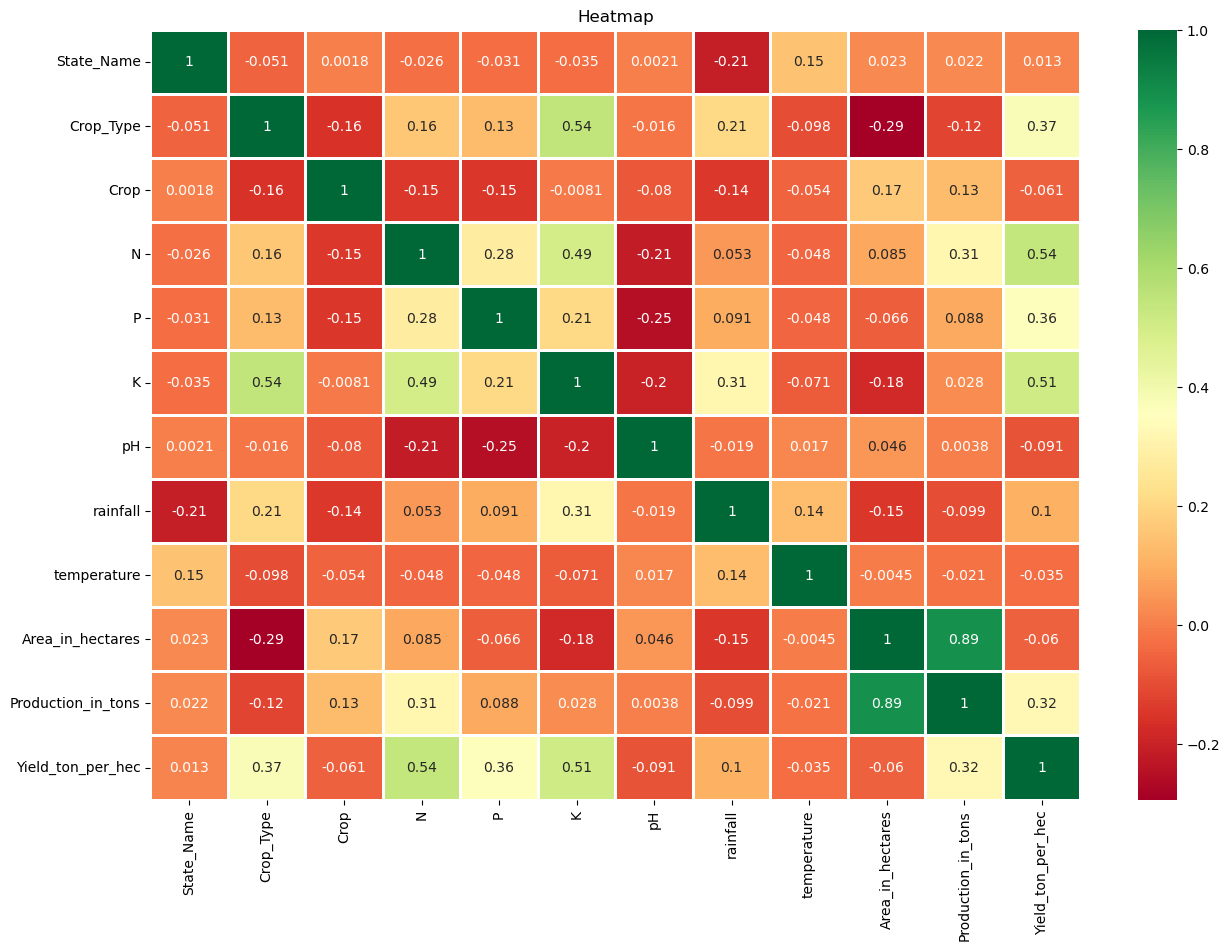

In [155]:
#create a heatmap to visualize the correlation between all features
#adjust the size of heatmap
plt.figure(figsize=(15,10))
#plot heatmap
heatmap=sns.heatmap(data_c,linewidth=1,linecolor=white,annot=True,cmap="RdYlGn")
#set title
plt.title("Heatmap")
plt.show()

# Model Preparation after EDA

In [156]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [157]:
x.head(2)

State_Name  Crop_Type  Crop         N   P         K        pH  rainfall  \
0           1          0    18  4.932424  40  2.714418  1.760885  8.681628   
1           1          0    24  2.714418  60  2.714418  1.835113  8.681628   

   temperature  Area_in_hectares  Production_in_tons  
0     3.081705         19.398774           21.104543  
1     3.081705         14.888056           10.000000

In [158]:
y.head(2)

0    1.087932
1    0.671679
Name: Yield_ton_per_hec, dtype: float64

In [159]:
import sklearn
from sklearn.model_selection import train_test_split

In [160]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=101)

In [161]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((79879, 11), (19970, 11), (79879,), (19970,))

# Linear Regression

In [162]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [163]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [164]:
lin_eda_p=lr.predict(xtest)
lin_eda_p

array([1.55705435, 2.98531881, 0.81640825, ..., 1.1603326 , 0.89375378,
       1.11512775])

In [165]:
lr.intercept_

-0.8670657179564496

In [166]:
lr.coef_

array([ 0.00136588,  0.0333503 ,  0.00111763,  0.08758368,  0.00412123,
        0.13019773,  0.51217228, -0.00292002,  0.0413246 , -0.08276317,
        0.07322524])

In [167]:
lin_eda_r2=lr.score(xtrain,ytrain) #alternate shortcut for r2
lin_eda_r2

0.7217195713866782

In [168]:
n=xtrain.shape[0]
k=xtrain.shape[1]

In [169]:
lin_eda_ar2=1-((1-lin_eda_r2)*(n-1))/(n-k-1)
lin_eda_ar2

0.7216812441086442

In [170]:
from sklearn import metrics
lin_eda_mse=metrics.mean_squared_error(ytest,lin_eda_p)
lin_eda_mse

0.10759040807411636

In [171]:
lin_eda_rmse=np.sqrt(lin_eda_mse)
lin_eda_rmse

0.32800976826020956

In [172]:
lin_eda_mae=metrics.mean_absolute_error(ytest,lin_eda_p)
lin_eda_mae

0.21154849857758892

In [173]:
error=ytest-lin_eda_p#error
ab_error=np.abs(error)#ab_error
mape=np.mean(ab_error/ytest)*100
mape

inf

In [174]:
lin_eda_acc=100-mape
lin_eda_acc

-inf

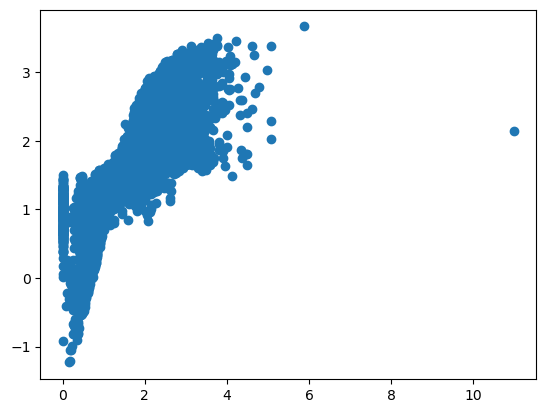

In [175]:
plt.scatter(ytest,lin_eda_p)
plt.show()

In [176]:
df=pd.DataFrame({"Actual":ytest,"Predicted":lin_eda_p})
df

Actual  Predicted
94710  1.401384   1.557054
57327  2.510944   2.985319
33719  0.693361   0.816408
98592  1.430434   1.493821
29886  0.609590  -0.040986
...         ...        ...
32851  0.793701   0.866092
61387  1.432919   1.498270
42501  1.108471   1.160333
3327   0.795263   0.893754
70727  1.216104   1.115128

[19970 rows x 2 columns]

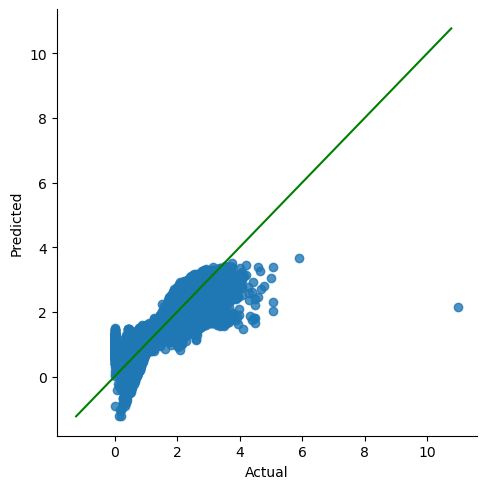

In [177]:
sns.lmplot(x="Actual",y="Predicted",data=df,fit_reg=False) #fit regression
#gives you most fitted two lines.
d_line=np.arange(df.min().min(),df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Lasso

In [178]:
from sklearn.linear_model import Lasso
la=Lasso()

In [179]:
la.fit(xtrain,ytrain)

Lasso()

In [180]:
las_eda_p = la.predict(xtest)
#la_p

In [181]:
la.coef_ #it is giving zero for non significant columns(feature selection)

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.00877451,
        0.        , -0.        ,  0.        , -0.        , -0.01385158,
        0.01896572])

In [182]:
la.intercept_

0.7652628973607449

In [183]:
df2=pd.DataFrame({"importances":list(la.coef_),"columns":list(x)})
df2

importances             columns
0      0.000000          State_Name
1      0.000000           Crop_Type
2     -0.000000                Crop
3      0.000000                   N
4      0.008775                   P
5      0.000000                   K
6     -0.000000                  pH
7      0.000000            rainfall
8     -0.000000         temperature
9     -0.013852    Area_in_hectares
10     0.018966  Production_in_tons

In [184]:
las_eda_r2=la.score(xtrain,ytrain)
las_eda_r2

0.3112867481863396

In [185]:
las_eda_ar2=1-((1-lin_eda_r2)*(79879-1))/(79879-11-1)
las_eda_ar2

0.7216812441086442

In [186]:
las_eda_mse=metrics.mean_squared_error(ytest,lin_eda_p)
las_eda_mse

0.10759040807411636

In [187]:
df1=pd.DataFrame({"Actual":ytest,"Predicted":las_eda_p})
df1

Actual  Predicted
94710  1.401384   1.349754
57327  2.510944   1.761628
33719  0.693361   0.938649
98592  1.430434   1.290743
29886  0.609590   1.055674
...         ...        ...
32851  0.793701   1.120058
61387  1.432919   1.420863
42501  1.108471   1.067026
3327   0.795263   1.300309
70727  1.216104   1.087895

[19970 rows x 2 columns]

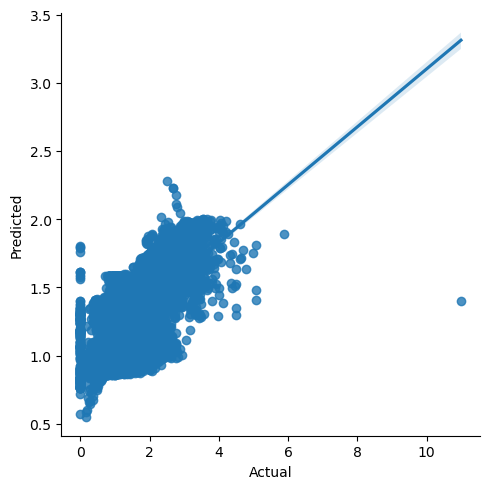

In [188]:
sns.lmplot(data=df1,x="Actual",y="Predicted")
plt.show()

# Ridge

In [189]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [190]:
rd.fit(xtrain,ytrain)

Ridge()

In [191]:
rid_eda_p=rd.predict(xtest)

In [192]:
rd.coef_

array([ 0.00136584,  0.03336099,  0.00111624,  0.08755377,  0.00411906,
        0.1301603 ,  0.50949628, -0.00291822,  0.04130636, -0.08276512,
        0.07322787])

In [193]:
rd.intercept_

-0.8619127009532077

In [194]:
df3=pd.DataFrame({"importances":list(rd.coef_),"columns":list(x)})
df3

importances             columns
0      0.001366          State_Name
1      0.033361           Crop_Type
2      0.001116                Crop
3      0.087554                   N
4      0.004119                   P
5      0.130160                   K
6      0.509496                  pH
7     -0.002918            rainfall
8      0.041306         temperature
9     -0.082765    Area_in_hectares
10     0.073228  Production_in_tons

In [195]:
rid_eda_r2=rd.score(xtrain,ytrain)
rid_eda_r2

0.7217195287066054

In [196]:
rid_eda_ar2=1-((1-rid_r2)*(79879-1))/(79879-11-1)
rid_ar2

0.014239421967283117

In [197]:
rid_eda_mse=metrics.mean_squared_error(ytest,rid_eda_p)
rid_eda_mse

0.10759012194354572

In [198]:
df4=pd.DataFrame({"Actual":ytest,"Predicted":rid_eda_p})
df4

Actual  Predicted
94710  1.401384   1.557106
57327  2.510944   2.985391
33719  0.693361   0.816380
98592  1.430434   1.493914
29886  0.609590  -0.040895
...         ...        ...
32851  0.793701   0.866139
61387  1.432919   1.498264
42501  1.108471   1.160071
3327   0.795263   0.893702
70727  1.216104   1.114952

[19970 rows x 2 columns]

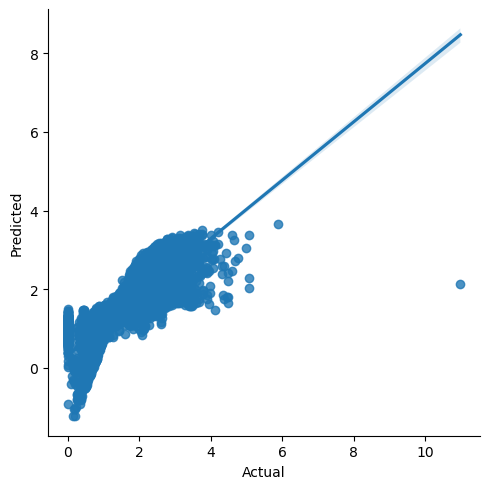

In [199]:
sns.lmplot(data=df4,x="Actual",y="Predicted")
plt.show()

# XGB Regressor

In [200]:
from xgboost import XGBRFRegressor
xgbr=XGBRFRegressor()

In [201]:
xgbr.fit(xtrain,ytrain)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [202]:
xgbr_eda_p=xgbr.predict(xtest)

In [203]:
xgbr_eda_r2=xgbr.score(xtrain,ytrain)
xgbr_eda_r2

0.8268225465612453

In [204]:
n=xtrain.shape[0] #no.of observations
k=xtrain.shape[1] #no. of predictors(features)

In [205]:
xgbr_eda_ar2=1-((1-xgbr_eda_r2)*(n-1))/(n-k-1)
print("Adjusted R square",xgbr_eda_ar2)

Adjusted R square 0.8267986950081905


In [206]:
from sklearn import metrics
xgbr_eda_mse=metrics.mean_squared_error(ytest,xgbr_eda_p)
xgbr_eda_mse

0.07031675193545428

# RF Regressor

In [207]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [208]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [209]:
rf_eda_p=rf.predict(xtest)

In [210]:
rf_eda_r2=rf.score(xtrain,ytrain)
rf_eda_r2

0.993384590128732

In [211]:
n=xtrain.shape[0] #no.of observations
k=xtrain.shape[1] #no. of predictors(features)

In [212]:
rf_eda_ar2=1-((1-rf_eda_r2)*(n-1))/(n-k-1)
print("Adjusted R square",rf_eda_ar2)

Adjusted R square 0.9933836789951151


In [213]:
from sklearn import metrics
rf_eda_mse=metrics.mean_squared_error(ytest,rf_eda_p)
rf_eda_mse

0.007386152223199835

# Comparison of model after EDA

In [214]:
l1=["linear","Lasso","Ridge","RF","XGB"]
l2=[lin_r2,las_r2,rid_r2,rf_r2,xgbr_r2]
l3=[lin_ar2,las_ar2,rid_ar2,rf_ar2,xgbr_ar2]
l4=[lin_mse,las_mse,rid_mse,rf_mse,xgbr_mse]

In [215]:
final2= pd.DataFrame({"model name":l1,"r2":l2,"ar2":l3,"mse":l4})
final2

model name        r2       ar2         mse
0     linear  0.014375  0.014239  126.014928
1      Lasso  0.012684  0.012548  128.078775
2      Ridge  0.014375  0.014239  126.014923
3         RF  0.899880  0.899866   12.427552
4        XGB  0.950772  0.950765   76.430115

In [216]:
data.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

# Feature Selection

In [217]:
newx=x.drop(['N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares'],axis=1)
newx

State_Name  Crop_Type  Crop  Production_in_tons
0               1          0    18           21.104543
1               1          0    24           10.000000
2               1          0    26           21.687029
3               1          0    29           16.984993
4               1          0    31            7.937005
...           ...        ...   ...                 ...
99844          32          1    52           17.271310
99845          32          2    29            7.312383
99846          32          2    42            6.549912
99847          32          1    42           38.506155
99848          32          1    44            4.562903

[99849 rows x 4 columns]

In [218]:
x_tr,x_te,y_tr,y_te = train_test_split(newx,y,test_size=0.2,random_state=101)

In [219]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((79879, 4), (19970, 4), (79879,), (19970,))

# Linear Regression

In [220]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [221]:
lr.fit(x_tr,y_tr)

LinearRegression()

In [222]:
lin_fs_p=lr.predict(x_te)

In [223]:
lr.intercept_

0.7241497250200245

In [224]:
lr.coef_ #Value of coeff. of every column of train(B1,B2,....)

array([ 0.0017312 ,  0.21351629, -0.00208494,  0.01910829])

In [225]:
lin_fs_r2=lr.score(x_tr,y_tr) #alternate shortcut for r2
lin_fs_r2

0.2757102972443721

In [226]:
n=xtrain.shape[0]
k=xtrain.shape[1]

In [227]:
lin_fs_ar2=1-((1-lin_fs_r2)*(n-1))/(n-k-1)
lin_fs_ar2

0.2756105415664286

In [228]:
from sklearn import metrics
lin_fs_mse=metrics.mean_squared_error(y_te,lin_fs_p)
lin_fs_mse

0.28803055865676663

In [229]:
lin_fs_rmse=np.sqrt(lin_eda_mse)
lin_fs_rmse

0.32800976826020956

In [230]:
lin_fs_mae=metrics.mean_absolute_error(y_te,lin_fs_p)
lin_fs_mae

0.3804673876254213

In [231]:
error=ytest-lin_fs_p#error
ab_error=np.abs(error)#ab_error
mape=np.mean(ab_error/y_te)*100
mape

inf

In [232]:
lin_fs_acc=100-mape
lin_fs_acc

-inf

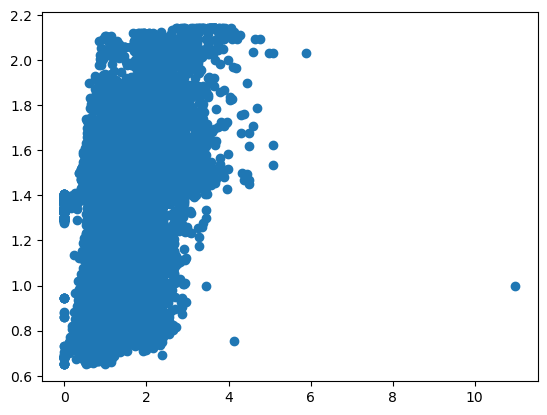

In [233]:
plt.scatter(y_te,lin_fs_p)
plt.show()

In [234]:
df2=pd.DataFrame({"Actual":ytest,"Predicted":lin_fs_p})
df

Actual  Predicted
94710  1.401384   1.557054
57327  2.510944   2.985319
33719  0.693361   0.816408
98592  1.430434   1.493821
29886  0.609590  -0.040986
...         ...        ...
32851  0.793701   0.866092
61387  1.432919   1.498270
42501  1.108471   1.160333
3327   0.795263   0.893754
70727  1.216104   1.115128

[19970 rows x 2 columns]

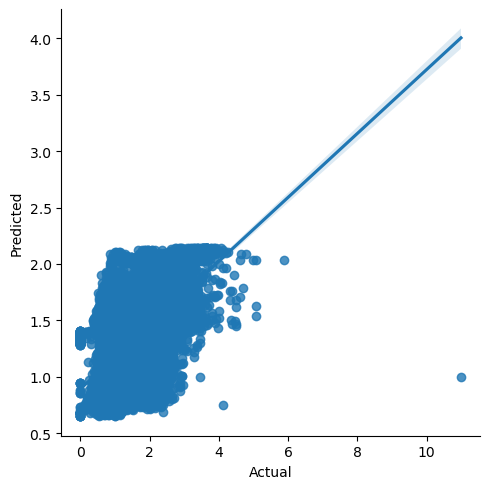

In [235]:
sns.lmplot(data=df2,x="Actual",y="Predicted")
plt.show()

# Lasso

In [236]:
from sklearn.linear_model import Lasso
la=Lasso()

In [237]:
la.fit(x_tr,y_tr)

Lasso()

In [238]:
las_fs_p=la.predict(x_te)

In [239]:
la.coef_ 

array([ 0.        ,  0.        , -0.        ,  0.01001954])

In [240]:
df3=pd.DataFrame({"importances":list(la.coef_),"columns":list(newx)})
df3

importances             columns
0      0.00000          State_Name
1      0.00000           Crop_Type
2     -0.00000                Crop
3      0.01002  Production_in_tons

In [241]:
las_fs_r2=la.score(x_tr,y_tr)
las_fs_r2

0.08855909890979452

In [242]:
las_fs_ar2= 1-((1-las_fs_r2)*(79879-1))/(79879-4-1)
las_fs_ar2

0.08851345497554353

In [243]:
las_fs_mse=metrics.mean_squared_error(y_te,las_fs_p)
las_fs_mse

0.370992295725615

In [244]:
df5=pd.DataFrame({"Actual":y_te,"Predicted":lin_fs_p})
df5

Actual  Predicted
94710  1.401384   1.145222
57327  2.510944   1.962094
33719  0.693361   1.388045
98592  1.430434   1.340486
29886  0.609590   1.014313
...         ...        ...
32851  0.793701   0.714591
61387  1.432919   1.419112
42501  1.108471   0.965547
3327   0.795263   0.826707
70727  1.216104   0.982532

[19970 rows x 2 columns]

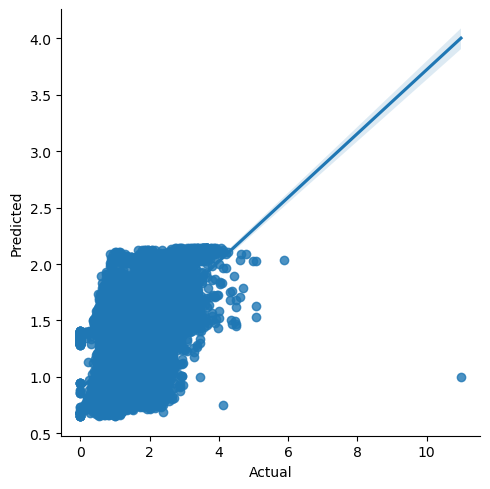

In [245]:
sns.lmplot(data=df5,x="Actual",y="Predicted")
plt.show()

# Ridge

In [246]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [247]:
rd.fit(x_tr,y_tr)

Ridge()

In [248]:
rid_p=rd.predict(x_te)

In [249]:
rd.intercept_

0.7241533942672951

In [250]:
rd.coef_

array([ 0.00173119,  0.2135144 , -0.00208497,  0.01910828])

In [251]:
df4=pd.DataFrame({"importances":list(rd.coef_),"columns":list(newx)})
df4

importances             columns
0     0.001731          State_Name
1     0.213514           Crop_Type
2    -0.002085                Crop
3     0.019108  Production_in_tons

In [252]:
rid_fs_r2=rd.score(x_tr,y_tr)
rid_fs_r2

0.27571029723180485

In [253]:
rid_fs_ar2= 1-((1-rid_fs_r2)*(79879-1))/(79879-4-1)
rid_fs_ar2

0.2756740256188761

In [254]:
rid_fs_mse=metrics.mean_squared_error(y_te,rid_p)
rid_fs_mse

0.28803061594797913

In [255]:
df4=pd.DataFrame({"Actual":ytest,"Predicted":rid_p})
df4

Actual  Predicted
94710  1.401384   1.145224
57327  2.510944   1.962090
33719  0.693361   1.388042
98592  1.430434   1.340487
29886  0.609590   1.014315
...         ...        ...
32851  0.793701   0.714594
61387  1.432919   1.419113
42501  1.108471   0.965547
3327   0.795263   0.826710
70727  1.216104   0.982532

[19970 rows x 2 columns]

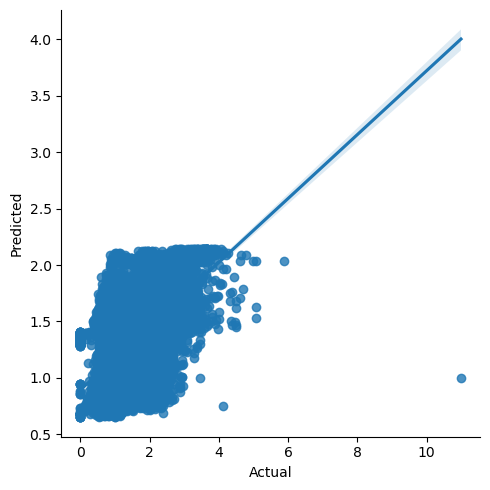

In [256]:
sns.lmplot(data=df4,x="Actual",y="Predicted")
plt.show()

# XGB Regressor

In [257]:
from xgboost import XGBRFRegressor
xgbr=XGBRFRegressor()

In [258]:
xgbr.fit(x_tr,y_tr)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [259]:
xgbr_fs_p=xgbr.predict(x_te)

In [260]:
xgbr_fs_r2=xgbr.score(x_tr,y_tr)
xgbr_fs_r2

0.6610394130675601

In [261]:
n=xtrain.shape[0] #no.of observations
k=xtrain.shape[1] #no. of predictors(features)

In [262]:
xgbr_fs_ar2=1-((1-xgbr_eda_r2)*(n-1))/(n-k-1)
print("Adjusted R square",xgbr_fs_ar2)

Adjusted R square 0.8267986950081905


In [263]:
from sklearn import metrics
xgbr_fs_mse=metrics.mean_squared_error(ytest,xgbr_fs_p)
xgbr_fs_mse

0.1357952802690406

# RF Regressor

In [264]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [265]:
rf.fit(x_tr,y_tr)

RandomForestRegressor()

In [266]:
rf_fs_p=rf.predict(x_te)

In [267]:
rf_fs_r2=rf.score(x_tr,y_tr)
rf_fs_r2

0.9711642800358885

In [268]:
n=xtrain.shape[0] #no.of observations
k=xtrain.shape[1] #no. of predictors(features)

In [269]:
rf_fs_ar2=1-((1-rf_fs_r2)*(n-1))/(n-k-1)
print("Adjusted R square",rf_fs_ar2)

Adjusted R square 0.9711603085217512


In [270]:
from sklearn import metrics
rf_fs_mse=metrics.mean_squared_error(y_te,rf_p)
rf_fs_mse

91.87680080924032

# Comparison of model after FS

In [271]:
l1=["linear","Lasso","Ridge","RF","XGB"]
l2=[lin_r2,las_r2,rid_r2,rf_r2,xgbr_r2]
l3=[lin_ar2,las_ar2,rid_ar2,rf_ar2,xgbr_ar2]
l4=[lin_mse,las_mse,rid_mse,rf_mse,xgbr_mse]

In [272]:
final3= pd.DataFrame({"model name":l1,"r2":l2,"ar2":l3,"mse":l4})
final3

model name        r2       ar2         mse
0     linear  0.014375  0.014239  126.014928
1      Lasso  0.012684  0.012548  128.078775
2      Ridge  0.014375  0.014239  126.014923
3         RF  0.899880  0.899866   12.427552
4        XGB  0.950772  0.950765   76.430115

# Comparison of all models

In [273]:
l1=["linear1","Lasso1","Ridge1","RF1","XGB1",
   "","linear2","Lasso2","Ridge2","RF2","XGB2",
   "","linear3","Lasso3","Ridge3","RF3","XGB3"]

l2=[lin_r2,las_r2,rid_r2,rf_r2,xgbr_r2,"",
   lin_eda_r2,las_eda_r2,rid_eda_r2,rf_eda_r2,xgbr_eda_r2,"",
   lin_fs_r2,las_fs_r2,rid_fs_r2,rf_fs_r2,xgbr_fs_r2]

l3=[lin_ar2,las_ar2,rid_ar2,rf_ar2,xgbr_ar2,"",
   lin_eda_ar2,las_eda_ar2,rid_eda_ar2,rf_eda_ar2,xgbr_eda_ar2,"",
   lin_fs_ar2,las_fs_ar2,rid_fs_ar2,rf_fs_ar2,xgbr_fs_ar2]

l4=[lin_mse,las_mse,rid_mse,rf_mse,xgbr_mse,"",
   lin_eda_mse,las_eda_mse,rid_eda_mse,rf_eda_mse,xgbr_eda_mse,"",
   lin_fs_mse,las_fs_mse,rid_fs_r2,rf_fs_mse,xgbr_fs_mse]



In [274]:
final4= pd.DataFrame({"model name":l1,"r2":l2,"ar2":l3,"mse":l4})
final4

model name        r2       ar2         mse
0     linear1  0.014375  0.014239  126.014928
1      Lasso1  0.012684  0.012548  128.078775
2      Ridge1  0.014375  0.014239  126.014923
3         RF1   0.89988  0.899866   12.427552
4        XGB1  0.950772  0.950765   76.430115
5                                            
6     linear2   0.72172  0.721681     0.10759
7      Lasso2  0.311287  0.721681     0.10759
8      Ridge2   0.72172  0.014239     0.10759
9         RF2  0.993385  0.993384    0.007386
10       XGB2  0.826823  0.826799    0.070317
11                                           
12    linear3   0.27571  0.275611    0.288031
13     Lasso3  0.088559  0.088513    0.370992
14     Ridge3   0.27571  0.275674     0.27571
15        RF3  0.971164   0.97116   91.876801
16       XGB3  0.661039  0.826799    0.135795

In [ ]:
#conclusion:-RF and XGB model have high r2 and low mse
            for this data feature selection is not working and we found after feature selection drastic change in mse is high
    Linear regression, Lasso, and Ridge regression yielded lower predictive accuracy compared to Random Forest and xgboost algorithems.  
    The choice of algorithm depends on the specific goals of the crop yield prediction task. 
    If the primary objective is accurate prediction, Random Forest is a strong choice.
    If interpretability is more critical, linear models like Lasso and Ridge are preferable.